# 1. Importing Necessary Libraries

In [3]:
!pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5MB 28kB/s 
     |████████████████████████████████| 512kB 26.0MB/s 
     |████████████████████████████████| 3.8MB 33.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=668a90b5fc5ab332a8ecaf967ecf5a9b1813073b34df13ce69cb3efe6ac3871f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2

In [0]:
import pandas as pd
import numpy as np
np.random.seed(1337)
from keras import Sequential
from keras.utils import Sequence
from keras.layers import LSTM, Dense, Masking
import numpy as np
import keras
from keras.utils import np_utils
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Embedding, Dense, Input, concatenate, Layer, Lambda, Dropout, Activation
import datetime
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, TensorBoard
import tensorflow as tf
import tensorflow_hub as hub

In [6]:
tf.__version__

'1.15.0'

# 2. Data processing (5 sentiments)

## 2.1 Import data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
exp = pd.read_excel('/content/drive/My Drive/OMSCS/CSE6240 Web Search & Text Mining/Project/EAC.xlsx')
iac = pd.read_excel('/content/drive/My Drive/OMSCS/CSE6240 Web Search & Text Mining/Project/IAC.xlsx')
tac = pd.read_excel('/content/drive/My Drive/OMSCS/CSE6240 Web Search & Text Mining/Project/TAC.xlsx')

In [0]:
train_raw = pd.concat([exp[['text','Humor',	'Sarcastic',	'Positive',	'Controversial',	'Argumentative']], \
           iac[['text','Humor',	'Sarcastic',	'Positive',	'Controversial',	'Argumentative']], \
           tac[['text','Humor',	'Sarcastic',	'Positive',	'Controversial',	'Argumentative']]], axis=0).reset_index(drop=True)

In [0]:
train_raw['label'] = np.argmax(np.array(train_raw[['Humor',	'Sarcastic',	'Positive',	'Controversial','Argumentative']])==1, axis=1)

## 2.2 Loading The Data

In [7]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1pC1OjamQ1m8XxdqwMAjGOnwWxhZfmYya"

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('url_to_article.pkl')  
df3 = pd.read_pickle('url_to_article.pkl')
# Dataset is now stored in a Pandas Dataframe

1pC1OjamQ1m8XxdqwMAjGOnwWxhZfmYya


In [8]:
link = "https://drive.google.com/open?id=1onrgx4WblN-H8xwkdNeJ4P88zvs3eYpx"

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ydata-ynacc-v1_0_expert_annotations.tsv')  
df_exp = pd.read_csv('ydata-ynacc-v1_0_expert_annotations.tsv', delimiter="\t", error_bad_lines=False)

1onrgx4WblN-H8xwkdNeJ4P88zvs3eYpx


In [9]:
link = "https://drive.google.com/open?id=1mpQW3XTVHOlM0zYdrOcCdkD95BiV96uz"

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ydata-ynacc-v1_0_IAC_annotations.tsv')  
df_iac = pd.read_csv('ydata-ynacc-v1_0_IAC_annotations.tsv', delimiter="\t", error_bad_lines=False)

1mpQW3XTVHOlM0zYdrOcCdkD95BiV96uz


In [10]:
link = "https://drive.google.com/open?id=1OpdDWuzFJIGVKf0UqyQi5jMIwkTlwazp"

fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ydata-ynacc-v1_0_turk_annotations.tsv')
df_turk = pd.read_csv('ydata-ynacc-v1_0_turk_annotations.tsv', delimiter="\t", error_bad_lines=False)

1OpdDWuzFJIGVKf0UqyQi5jMIwkTlwazp


In [0]:
articles = df3[df3.text!=""]

In [12]:
train_raw = df_exp
train_raw.head()

,sdid,commentindex,headline,url,guid,commentid,timestamp,thumbs-up,thumbs-down,text,parentid,constructiveclass,sd_agreement,sd_type,sentiment,tone,commentagreement,topic,intendedaudience,persuasiveness
0,53971,2,Disneyland Worker Found Dead in Haunted Mansion,http://www.cosmopolitan.com/lifestyle/news/a56...,rjrPtwH5oVVuQnEXX3hf,00003n000000000000000000000000-ed2ae6d0-32ac-4...,1459917444,NaN,NaN,"These things happen , Every job has its dangers.",1459879464596-a3771c05-fd2e-4f44-a26a-23baec3b...,Constructive,NaN,Positive/respectful,negative,NaN,Disagreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive
1,53971,0,Disneyland Worker Found Dead in Haunted Mansion,http://www.cosmopolitan.com/lifestyle/news/a56...,VaW6HEsuOFUAIBqjw1k~,1459879464596-a3771c05-fd2e-4f44-a26a-23baec3b...,1459879464,1.0,NaN,Sad to hear such a bad thing. Very dangerous j...,NaN,Constructive,NaN,Positive/respectful,mixed,NaN,NaN,Off-topic with article,Broadcast message / general audience,Not persuasive
2,53971,1,Disneyland Worker Found Dead in Haunted Mansion,http://www.cosmopolitan.com/lifestyle/news/a56...,uwQePj970KaMZuW3~9Q9,00002n000000000000000000000000-1c30b878-b717-4...,1459881644,NaN,NaN,Yes..because too many houses in EU look like t...,1459879464596-a3771c05-fd2e-4f44-a26a-23baec3b...,Constructive,NaN,Positive/respectful,neutral,Informative,NaN,Off-topic with article,Reply to a specific commenter,Not persuasive
3,135929,0,This Old Navy Ad Featuring an Interracial Fami...,http://mic.com/articles/142323/this-old-navy-a...,fixyWJivQjEQtPLLVXsu,1462203719963-3eeffb02-faae-4b51-9174-704c57e6...,1462203719,18.0,3.0,"I am frankly quite SICK of the phrase ""shoved ...",NaN,Not constructive,Agreement throughout,Off-topic/digression,negative,Mean,NaN,Off-topic with article,Broadcast message / general audience,Persuasive
4,135929,1,This Old Navy Ad Featuring an Interracial Fami...,http://mic.com/articles/142323/this-old-navy-a...,_TDnK715vO5y0OzZz_n4,00002I000000000000000000000000-7ef2ac58-bd84-4...,1462204643,7.0,2.0,"Ya, I always wonder why the conservatives are ...",1462203719963-3eeffb02-faae-4b51-9174-704c57e6...,Not constructive,Agreement throughout,Off-topic/digression,neutral,Sarcastic,Agreement with commenter,Off-topic with article,Reply to a specific commenter,Not persuasive


In [13]:
train_raw.shape

(23383, 20)

## 2.3 Preprocessing Data

Select non null:

In [14]:
train_raw = train_raw[train_raw.text.notnull()]
train_raw.shape

(23383, 20)

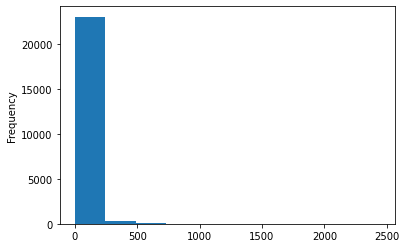

In [15]:
train_raw.text.apply(lambda x: len(x.split())).plot(kind='hist')

In [16]:
train_raw['len_txt'] =train_raw.text.apply(lambda x: len(x.split()))
train_raw.describe()

,sdid,commentindex,timestamp,thumbs-up,thumbs-down,len_txt
count,23383.000000,23383.000000,2.338300e+04,16602.000000,14778.000000,23383.000000
mean,80398.647522,3.373049,1.461384e+09,6.985243,3.968873,45.476372
std,50722.026622,2.877231,3.117790e+06,14.963799,4.831545,75.455620
min,27.000000,0.000000,1.418834e+09,-1.000000,1.000000,1.000000
25%,39565.000000,1.000000,1.460433e+09,1.000000,1.000000,12.000000
50%,76889.000000,3.000000,1.461212e+09,3.000000,2.000000,25.000000
75%,118961.000000,5.000000,1.461972e+09,6.000000,5.000000,53.000000
max,215878.000000,15.000000,1.472131e+09,348.000000,91.000000,2440.000000


In [17]:
train_raw.shape

(23383, 21)

Select only the row with number of words greater than 250:

In [18]:
#train_raw = train_raw[train_raw.len_txt >249]
#train_raw.shape
ind = train_raw.len_txt>512
ind.sum()

66

In [19]:
train_raw = train_raw[['text', 'sentiment']]
train_raw.reset_index(inplace=True, drop=True)
train_raw.head()

,text,sentiment
0,"These things happen , Every job has its dangers.",negative
1,Sad to hear such a bad thing. Very dangerous j...,mixed
2,Yes..because too many houses in EU look like t...,neutral
3,"I am frankly quite SICK of the phrase ""shoved ...",negative
4,"Ya, I always wonder why the conservatives are ...",neutral


Group similar products

In [0]:
train_raw['label'] = train_raw['sentiment'].astype('str')
train_raw['label'][train_raw['label']=='neutral'] = 'positive'
train_raw = train_raw[train_raw['label']!='nan']
train_raw = train_raw.drop(columns = 'sentiment')

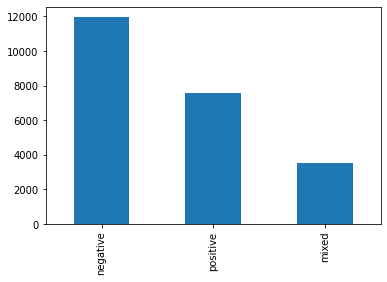

In [21]:
train_raw['label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [0]:
train_raw = train_raw[['text','label']]

In [23]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train_raw['label'] = LE.fit_transform(train_raw['label'])
train_raw.head()

,text,label
0,"These things happen , Every job has its dangers.",1
1,Sad to hear such a bad thing. Very dangerous j...,0
2,Yes..because too many houses in EU look like t...,2
3,"I am frankly quite SICK of the phrase ""shoved ...",1
4,"Ya, I always wonder why the conservatives are ...",2


In [24]:
len(np.unique(train_raw['label']))

3

In [0]:
train = train_raw.copy()

In [26]:
train = train.reindex(np.random.permutation(train.index))
train.head()

,text,label
4582,I agree. No one has the right to hide that sor...,2
1534,Speaking of Aliens... I wonder where they go t...,2
6142,Only 3 billion in new shares? Pumped up stock ...,1
10236,His appeals to a certain demographic.,2
22589,"Globalization is a great idea, theoretically. ...",1


Clean the text columns

In [0]:
import re
def clean_txt(text):
    text = re.sub("'", "",text)
    text=re.sub("(\\W)+"," ",text)    
    return text

In [28]:
train['text']  = train.text.apply(clean_txt)
train.head()

,text,label
4582,I agree No one has the right to hide that sort...,2
1534,Speaking of Aliens I wonder where they go to f...,2
6142,Only 3 billion in new shares Pumped up stock o...,1
10236,His appeals to a certain demographic,2
22589,Globalization is a great idea theoretically Co...,1


In [29]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=35)
train.head()

,text,label
2387,They look like the typical liberals,1
18266,So his point is that there are loving interrac...,0
7773,Ernest you is correct If the attackers were wh...,0
20295,please take your medicine then read your ignor...,1
12576,funny im saying the same thing about PS4 right...,0


In [30]:
val.shape, train.shape

((4611, 2), (18444, 2))

In [31]:
#Installing BERT module
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.0MB/s 


In [32]:
#Importing BERT modules
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

# Setting The Output Directory for BERT

In [33]:
# Set the output directory for saving model file
OUTPUT_DIR = '/bert_news_category'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = True #@param {type:"boolean"}

if DO_DELETE:
    try:
        tf.gfile.DeleteRecursively(OUTPUT_DIR)
    except:
        pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /bert_news_category *****


In [34]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
# print("Test Set Shape :", test.shape)

Training Set Shape : (18444, 2)
Validation Set Shape : (4611, 2)


In [35]:
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'
# The list containing all the classes (train['SECTION'].unique())
label_list = [x for x in np.unique(train.label)]
label_list

[0, 1, 2]

In [36]:
train_lo = train[~train.index.isin(ind[ind==True].index)]
train_hi = train[train.index.isin(ind[ind==True].index)]
val_lo = val[~val.index.isin(ind[ind==True].index)]
val_hi = val[val.index.isin(ind[ind==True].index)]
print(train_lo.shape)
print(train_hi.shape)
print(val_lo.shape)
print(val_hi.shape)

(18389, 2)
(55, 2)
(4600, 2)
(11, 2)


# Splitting the Data into smaller chunks

In [0]:
def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200]
      l_total.append(" ".join(l_parcial))
  return l_total

In [38]:
train_hi['text_split'] = train_hi[DATA_COLUMN].apply(get_split)
train_hi.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,label,text_split
14693,I used to think the RocknRoll Hall of Fame mea...,1,[I used to think the RocknRoll Hall of Fame me...
920,No one has ever died from a Marijuana overdose...,0,[No one has ever died from a Marijuana overdos...
11581,It doesnt matter if someone has one tattoo or ...,0,[It doesnt matter if someone has one tattoo or...
679,USERNAME I suspect you fear the government an...,1,[USERNAME I suspect you fear the government an...
13698,AIRHEAD MOOSE HUNTING Palin SUING LMBO Any Jud...,1,[AIRHEAD MOOSE HUNTING Palin SUING LMBO Any Ju...


In [39]:
val_hi['text_split'] = val_hi[DATA_COLUMN].apply(get_split)
val_hi.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,label,text_split
7037,Why are Blacks hated part 1 African Americans ...,2,[Why are Blacks hated part 1 African Americans...
8894,Did you explain the following to him because I...,1,[Did you explain the following to him because ...


In [40]:
train_l = []
label_l = []
index_l =[]
for idx,row in train_hi.iterrows():
  for l in row['text_split']:
    train_l.append(l)
    label_l.append(row['label'])
    index_l.append(idx)
len(train_l), len(label_l), len(index_l)

(327, 327, 327)

In [41]:
val_l = []
val_label_l = []
val_index_l = []
for idx,row in val_hi.iterrows():
  for l in row['text_split']:
    val_l.append(l)
    val_label_l.append(row['label'])
    val_index_l.append(idx)
len(val_l), len(val_label_l), len(val_index_l)

(55, 55, 55)

The final dataset for training:

In [42]:
train_df = pd.DataFrame({DATA_COLUMN:train_l, LABEL_COLUMN:label_l})
train_df.head()

,text,label
0,I used to think the RocknRoll Hall of Fame mea...,1
1,Definitely two of my favs ToNs lead singer Pet...,1
2,word Ask Eric Clapton who personally and openl...,1
3,No one has ever died from a Marijuana overdose...,0
4,they destroy on pot crimes that would go away ...,0


In [43]:
val_df = pd.DataFrame({DATA_COLUMN:val_l, LABEL_COLUMN:val_label_l})
val_df.head()

,text,label
0,Why are Blacks hated part 1 African Americans ...,2
1,what it should be according to their populatio...,2
2,Americans account for 32 of Other Assault Crim...,2
3,times compared to what it should be according ...,2
4,have a 0 52 ratio African Americans account fo...,2


In [0]:
train_df = pd.concat([train_df, train_lo], axis=0).reset_index(drop=True)
val_df = pd.concat([val_df, val_lo], axis=0).reset_index(drop=True)

In [45]:
train_df.to_csv('/content/drive/My Drive/OMSCS/CSE6240 Web Search & Text Mining/Project/train_df5.csv')
val_df.to_csv('/content/drive/My Drive/OMSCS/CSE6240 Web Search & Text Mining/Project/val_df5.csv')

FileNotFoundError: ignored

# BERT: Data Preprocessing 

Process the data for BERT

In [0]:
train_InputExamples = train_df.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val_df.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [47]:
train_InputExamples

0        <bert.run_classifier.InputExample object at 0x...
1        <bert.run_classifier.InputExample object at 0x...
2        <bert.run_classifier.InputExample object at 0x...
3        <bert.run_classifier.InputExample object at 0x...
4        <bert.run_classifier.InputExample object at 0x...
                               ...                        
18711    <bert.run_classifier.InputExample object at 0x...
18712    <bert.run_classifier.InputExample object at 0x...
18713    <bert.run_classifier.InputExample object at 0x...
18714    <bert.run_classifier.InputExample object at 0x...
18715    <bert.run_classifier.InputExample object at 0x...
Length: 18716, dtype: object

In [48]:
print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  I used to think the RocknRoll Hall of Fame meant royalty until I discovered WHO started it and why Im surprised someone didnt beat Jann Werner to it Gotta give him credit for pushing forth HIS pet project but in truth its a personal club HIS club The people have very little to do with the selection I agree with quite a few on your list No 1 being Love Arthur Lee was a visionary Fire up the song Seven and Seven and see if you can sit still Anytime I want a caffeine jolt this is the song that does it I can live with Journey Steve Perrys voice is a classic I agree about the Cure But add another C band the Cult Ian Astburys is as powerful as any singer whoever stood behind a mic Metal bands Type O Negative and Rammstein Two of the finest ever Definitely two of my favs ToNs lead singer Peter Steele had a persona about him that still resonates five years after his death Rammstein is simply riveting to watch Th

# BERT: Loading the pre-trained model

In [49]:

# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [50]:
len(tokenizer.vocab.keys())

30522

In [51]:
#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['i', 'used', 'to', 'think', 'the', 'rock', '##nr', '##oll', 'hall', 'of', 'fame', 'meant', 'royalty', 'until', 'i', 'discovered', 'who', 'started', 'it', 'and', 'why', 'im', 'surprised', 'someone', 'didn', '##t', 'beat', 'jan', '##n', 'werner', 'to', 'it', 'gotta', 'give', 'him', 'credit', 'for', 'pushing', 'forth', 'his', 'pet', 'project', 'but', 'in', 'truth', 'its', 'a', 'personal', 'club', 'his', 'club', 'the', 'people', 'have', 'very', 'little', 'to', 'do', 'with', 'the', 'selection', 'i', 'agree', 'with', 'quite', 'a', 'few', 'on', 'your', 'list', 'no', '1', 'being', 'love', 'arthur', 'lee', 'was', 'a', 'visionary', 'fire', 'up', 'the', 'song', 'seven', 'and', 'seven', 'and', 'see', 'if', 'you', 'can', 'sit', 'still', 'anytime', 'i', 'want', 'a', 'caf', '##fe', '##ine', 'jolt', 'this', 'is', 'the', 'song', 'that', 'does', 'it', 'i', 'can', 'live', 'with', 'journey', 'steve', 'perry', '##s', 'voice', 'is', 'a', 'classic', 'i', 'agree', 'about', 'the', 'cure', 'but', 'add', 'anoth

In [0]:
MAX_SEQ_LENGTH = 512

In [53]:
# Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 18716


INFO:tensorflow:Writing example 0 of 18716


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] i used to think the rock ##nr ##oll hall of fame meant royalty until i discovered who started it and why im surprised someone didn ##t beat jan ##n werner to it gotta give him credit for pushing forth his pet project but in truth its a personal club his club the people have very little to do with the selection i agree with quite a few on your list no 1 being love arthur lee was a visionary fire up the song seven and seven and see if you can sit still anytime i want a caf ##fe ##ine jolt this is the song that does it i can live with journey steve perry ##s voice is a classic i agree about the cure but add another c band the cult ian as ##t ##bury ##s is as powerful as any singer whoever stood behind a mic metal bands type o negative and ram ##ms ##tein two of the finest ever definitely two of my fa ##vs tons lead singer peter steele had a persona about him that still res ##onate ##s five years after his death ram ##ms ##tein is simply ri ##vet ##ing to watc

INFO:tensorflow:tokens: [CLS] i used to think the rock ##nr ##oll hall of fame meant royalty until i discovered who started it and why im surprised someone didn ##t beat jan ##n werner to it gotta give him credit for pushing forth his pet project but in truth its a personal club his club the people have very little to do with the selection i agree with quite a few on your list no 1 being love arthur lee was a visionary fire up the song seven and seven and see if you can sit still anytime i want a caf ##fe ##ine jolt this is the song that does it i can live with journey steve perry ##s voice is a classic i agree about the cure but add another c band the cult ian as ##t ##bury ##s is as powerful as any singer whoever stood behind a mic metal bands type o negative and ram ##ms ##tein two of the finest ever definitely two of my fa ##vs tons lead singer peter steele had a persona about him that still res ##onate ##s five years after his death ram ##ms ##tein is simply ri ##vet ##ing to watc

INFO:tensorflow:input_ids: 101 1045 2109 2000 2228 1996 2600 16118 14511 2534 1997 4476 3214 16664 2127 1045 3603 2040 2318 2009 1998 2339 10047 4527 2619 2134 2102 3786 5553 2078 14121 2000 2009 10657 2507 2032 4923 2005 6183 5743 2010 9004 2622 2021 1999 3606 2049 1037 3167 2252 2010 2252 1996 2111 2031 2200 2210 2000 2079 2007 1996 4989 1045 5993 2007 3243 1037 2261 2006 2115 2862 2053 1015 2108 2293 4300 3389 2001 1037 28036 2543 2039 1996 2299 2698 1998 2698 1998 2156 2065 2017 2064 4133 2145 15933 1045 2215 1037 24689 7959 3170 22538 2023 2003 1996 2299 2008 2515 2009 1045 2064 2444 2007 4990 3889 6890 2015 2376 2003 1037 4438 1045 5993 2055 1996 9526 2021 5587 2178 1039 2316 1996 8754 4775 2004 2102 4917 2015 2003 2004 3928 2004 2151 3220 9444 2768 2369 1037 23025 3384 4996 2828 1051 4997 1998 8223 5244 9589 2048 1997 1996 10418 2412 5791 2048 1997 2026 6904 15088 6197 2599 3220 2848 12872 2018 1037 16115 2055 2032 2008 2145 24501 21149 2015 2274 2086 2044 2010 2331 8223 5244 95

INFO:tensorflow:input_ids: 101 1045 2109 2000 2228 1996 2600 16118 14511 2534 1997 4476 3214 16664 2127 1045 3603 2040 2318 2009 1998 2339 10047 4527 2619 2134 2102 3786 5553 2078 14121 2000 2009 10657 2507 2032 4923 2005 6183 5743 2010 9004 2622 2021 1999 3606 2049 1037 3167 2252 2010 2252 1996 2111 2031 2200 2210 2000 2079 2007 1996 4989 1045 5993 2007 3243 1037 2261 2006 2115 2862 2053 1015 2108 2293 4300 3389 2001 1037 28036 2543 2039 1996 2299 2698 1998 2698 1998 2156 2065 2017 2064 4133 2145 15933 1045 2215 1037 24689 7959 3170 22538 2023 2003 1996 2299 2008 2515 2009 1045 2064 2444 2007 4990 3889 6890 2015 2376 2003 1037 4438 1045 5993 2055 1996 9526 2021 5587 2178 1039 2316 1996 8754 4775 2004 2102 4917 2015 2003 2004 3928 2004 2151 3220 9444 2768 2369 1037 23025 3384 4996 2828 1051 4997 1998 8223 5244 9589 2048 1997 1996 10418 2412 5791 2048 1997 2026 6904 15088 6197 2599 3220 2848 12872 2018 1037 16115 2055 2032 2008 2145 24501 21149 2015 2274 2086 2044 2010 2331 8223 5244 95

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] definitely two of my fa ##vs tons lead singer peter steele had a persona about him that still res ##onate ##s five years after his death ram ##ms ##tein is simply ri ##vet ##ing to watch there ##s no opera ever written that can create the powerful emotions than these guys produce with their brand of music and show ##manship and what about steppe ##n ##wo ##lf the term heavy metal thunder came from a mars bonfire penned lyric in the song born to be wild over four decades john kay has been true to the roots of rock he and the band are still out there putting forth the classics never seen a bad show ever as for your suggestions of ba ##uh ##aus and sisters of mercy definitely id add ne ##na from germany alongside kraft ##werk speaking of sf bands hot tuna produced just as much excitement as jefferson airplane jo ##rma ka ##uk ##onne ##n plays guitar like few others on the planet don ##t take my word ask eric clapton who personally and openly said so the 80s a

INFO:tensorflow:tokens: [CLS] definitely two of my fa ##vs tons lead singer peter steele had a persona about him that still res ##onate ##s five years after his death ram ##ms ##tein is simply ri ##vet ##ing to watch there ##s no opera ever written that can create the powerful emotions than these guys produce with their brand of music and show ##manship and what about steppe ##n ##wo ##lf the term heavy metal thunder came from a mars bonfire penned lyric in the song born to be wild over four decades john kay has been true to the roots of rock he and the band are still out there putting forth the classics never seen a bad show ever as for your suggestions of ba ##uh ##aus and sisters of mercy definitely id add ne ##na from germany alongside kraft ##werk speaking of sf bands hot tuna produced just as much excitement as jefferson airplane jo ##rma ka ##uk ##onne ##n plays guitar like few others on the planet don ##t take my word ask eric clapton who personally and openly said so the 80s a

INFO:tensorflow:input_ids: 101 5791 2048 1997 2026 6904 15088 6197 2599 3220 2848 12872 2018 1037 16115 2055 2032 2008 2145 24501 21149 2015 2274 2086 2044 2010 2331 8223 5244 9589 2003 3432 15544 19510 2075 2000 3422 2045 2015 2053 3850 2412 2517 2008 2064 3443 1996 3928 6699 2084 2122 4364 3965 2007 2037 4435 1997 2189 1998 2265 21530 1998 2054 2055 29096 2078 12155 10270 1996 2744 3082 3384 8505 2234 2013 1037 7733 28698 17430 13677 1999 1996 2299 2141 2000 2022 3748 2058 2176 5109 2198 10905 2038 2042 2995 2000 1996 6147 1997 2600 2002 1998 1996 2316 2024 2145 2041 2045 5128 5743 1996 10002 2196 2464 1037 2919 2265 2412 2004 2005 2115 15690 1997 8670 27225 20559 1998 5208 1997 8673 5791 8909 5587 11265 2532 2013 2762 4077 26680 29548 4092 1997 16420 4996 2980 24799 2550 2074 2004 2172 8277 2004 7625 13297 8183 17830 10556 6968 18256 2078 3248 2858 2066 2261 2500 2006 1996 4774 2123 2102 2202 2026 2773 3198 4388 24705 2040 7714 1998 10132 2056 2061 1996 16002 2894 2038 2438 17092 19

INFO:tensorflow:input_ids: 101 5791 2048 1997 2026 6904 15088 6197 2599 3220 2848 12872 2018 1037 16115 2055 2032 2008 2145 24501 21149 2015 2274 2086 2044 2010 2331 8223 5244 9589 2003 3432 15544 19510 2075 2000 3422 2045 2015 2053 3850 2412 2517 2008 2064 3443 1996 3928 6699 2084 2122 4364 3965 2007 2037 4435 1997 2189 1998 2265 21530 1998 2054 2055 29096 2078 12155 10270 1996 2744 3082 3384 8505 2234 2013 1037 7733 28698 17430 13677 1999 1996 2299 2141 2000 2022 3748 2058 2176 5109 2198 10905 2038 2042 2995 2000 1996 6147 1997 2600 2002 1998 1996 2316 2024 2145 2041 2045 5128 5743 1996 10002 2196 2464 1037 2919 2265 2412 2004 2005 2115 15690 1997 8670 27225 20559 1998 5208 1997 8673 5791 8909 5587 11265 2532 2013 2762 4077 26680 29548 4092 1997 16420 4996 2980 24799 2550 2074 2004 2172 8277 2004 7625 13297 8183 17830 10556 6968 18256 2078 3248 2858 2066 2261 2500 2006 1996 4774 2123 2102 2202 2026 2773 3198 4388 24705 2040 7714 1998 10132 2056 2061 1996 16002 2894 2038 2438 17092 19

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] word ask eric clapton who personally and openly said so the 80s alone has enough overlooked and probably never elected bands that would fill up a wing of the ho ##f psychedelic fur ##s were known primarily for pretty in pink but richard butler ##s voice and lyrics were stronger than current ind ##uc ##tee joan jett how in hell did she make it in one hit one cover and that ##s it what body of work over 25 y ##rs the bang ##les and the go go ##s over madonna any day they could perform and speaking of powerful female voices i def ##y anyone to overlook concrete blonde ##s john ##ette ne ##pol ##itan ##o listen to joey or leonard cohen ##s everybody knows she covers and then tell me there ##s a better female singer anywhere i have far too many to list and probably leaving out more than id like to list but i agree with those who def ##y the sainte ##d cleveland based hall but inducted in nyc venue jan ##n werner and his hen ##ch ##men call bon ##af ##ide recent

INFO:tensorflow:tokens: [CLS] word ask eric clapton who personally and openly said so the 80s alone has enough overlooked and probably never elected bands that would fill up a wing of the ho ##f psychedelic fur ##s were known primarily for pretty in pink but richard butler ##s voice and lyrics were stronger than current ind ##uc ##tee joan jett how in hell did she make it in one hit one cover and that ##s it what body of work over 25 y ##rs the bang ##les and the go go ##s over madonna any day they could perform and speaking of powerful female voices i def ##y anyone to overlook concrete blonde ##s john ##ette ne ##pol ##itan ##o listen to joey or leonard cohen ##s everybody knows she covers and then tell me there ##s a better female singer anywhere i have far too many to list and probably leaving out more than id like to list but i agree with those who def ##y the sainte ##d cleveland based hall but inducted in nyc venue jan ##n werner and his hen ##ch ##men call bon ##af ##ide recent

INFO:tensorflow:input_ids: 101 2773 3198 4388 24705 2040 7714 1998 10132 2056 2061 1996 16002 2894 2038 2438 17092 1998 2763 2196 2700 4996 2008 2052 6039 2039 1037 3358 1997 1996 7570 2546 18147 6519 2015 2020 2124 3952 2005 3492 1999 5061 2021 2957 7055 2015 2376 1998 4581 2020 6428 2084 2783 27427 14194 17389 7437 22962 2129 1999 3109 2106 2016 2191 2009 1999 2028 2718 2028 3104 1998 2008 2015 2009 2054 2303 1997 2147 2058 2423 1061 2869 1996 9748 4244 1998 1996 2175 2175 2015 2058 11284 2151 2154 2027 2071 4685 1998 4092 1997 3928 2931 5755 1045 13366 2100 3087 2000 27590 5509 9081 2015 2198 7585 11265 18155 25451 2080 4952 2000 9558 2030 7723 9946 2015 7955 4282 2016 4472 1998 2059 2425 2033 2045 2015 1037 2488 2931 3220 5973 1045 2031 2521 2205 2116 2000 2862 1998 2763 2975 2041 2062 2084 8909 2066 2000 2862 2021 1045 5993 2007 2216 2040 13366 2100 1996 16947 2094 6044 2241 2534 2021 8120 1999 16392 6891 5553 2078 14121 1998 2010 21863 2818 3549 2655 14753 10354 5178 3728 22260 2

INFO:tensorflow:input_ids: 101 2773 3198 4388 24705 2040 7714 1998 10132 2056 2061 1996 16002 2894 2038 2438 17092 1998 2763 2196 2700 4996 2008 2052 6039 2039 1037 3358 1997 1996 7570 2546 18147 6519 2015 2020 2124 3952 2005 3492 1999 5061 2021 2957 7055 2015 2376 1998 4581 2020 6428 2084 2783 27427 14194 17389 7437 22962 2129 1999 3109 2106 2016 2191 2009 1999 2028 2718 2028 3104 1998 2008 2015 2009 2054 2303 1997 2147 2058 2423 1061 2869 1996 9748 4244 1998 1996 2175 2175 2015 2058 11284 2151 2154 2027 2071 4685 1998 4092 1997 3928 2931 5755 1045 13366 2100 3087 2000 27590 5509 9081 2015 2198 7585 11265 18155 25451 2080 4952 2000 9558 2030 7723 9946 2015 7955 4282 2016 4472 1998 2059 2425 2033 2045 2015 1037 2488 2931 3220 5973 1045 2031 2521 2205 2116 2000 2862 1998 2763 2975 2041 2062 2084 8909 2066 2000 2862 2021 1045 5993 2007 2216 2040 13366 2100 1996 16947 2094 6044 2241 2534 2021 8120 1999 16392 6891 5553 2078 14121 1998 2010 21863 2818 3549 2655 14753 10354 5178 3728 22260 2

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:label: 1 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] no one has ever died from a marijuana overdose you need at least 300 times the into ##xi ##cating amount to die so why are there any guidelines for marijuana other than it should be treated like alcohol with alcohol no one registers no one is tracked no one is limited so why the ongoing freak out on marijuana we need to stop acting like its some kind of heavy criminal drug thing o we should really ask ourselves what the heck are people we have let be in charge trying to stop by not legal ##izing marijuana or limiting marijuana and putting out propaganda and sensation ##ali ##zed false police reports o are they part of the dea are they part of the police are they part of the judicial system because all of those people i just mentioned are very biased because they are protecting their jobs that oversees the millions of lives they destroy on pot crimes that would go away if pot was legal ##ized o o or are these fighters of legal ##ization so prop ##aga ##ndi 

INFO:tensorflow:tokens: [CLS] no one has ever died from a marijuana overdose you need at least 300 times the into ##xi ##cating amount to die so why are there any guidelines for marijuana other than it should be treated like alcohol with alcohol no one registers no one is tracked no one is limited so why the ongoing freak out on marijuana we need to stop acting like its some kind of heavy criminal drug thing o we should really ask ourselves what the heck are people we have let be in charge trying to stop by not legal ##izing marijuana or limiting marijuana and putting out propaganda and sensation ##ali ##zed false police reports o are they part of the dea are they part of the police are they part of the judicial system because all of those people i just mentioned are very biased because they are protecting their jobs that oversees the millions of lives they destroy on pot crimes that would go away if pot was legal ##ized o o or are these fighters of legal ##ization so prop ##aga ##ndi 

INFO:tensorflow:input_ids: 101 2053 2028 2038 2412 2351 2013 1037 16204 26641 2017 2342 2012 2560 3998 2335 1996 2046 9048 18252 3815 2000 3280 2061 2339 2024 2045 2151 11594 2005 16204 2060 2084 2009 2323 2022 5845 2066 6544 2007 6544 2053 2028 18687 2053 2028 2003 12808 2053 2028 2003 3132 2061 2339 1996 7552 11576 2041 2006 16204 2057 2342 2000 2644 3772 2066 2049 2070 2785 1997 3082 4735 4319 2518 1051 2057 2323 2428 3198 9731 2054 1996 17752 2024 2111 2057 2031 2292 2022 1999 3715 2667 2000 2644 2011 2025 3423 6026 16204 2030 14879 16204 1998 5128 2041 10398 1998 8742 11475 5422 6270 2610 4311 1051 2024 2027 2112 1997 1996 26709 2024 2027 2112 1997 1996 2610 2024 2027 2112 1997 1996 8268 2291 2138 2035 1997 2216 2111 1045 2074 3855 2024 2200 25352 2138 2027 2024 8650 2037 5841 2008 22558 1996 8817 1997 3268 2027 6033 2006 8962 6997 2008 2052 2175 2185 2065 8962 2001 3423 3550 1051 1051 2030 2024 2122 7299 1997 3423 3989 2061 17678 16098 16089 5422 1998 4895 2378 29021 2008 2027 22

INFO:tensorflow:input_ids: 101 2053 2028 2038 2412 2351 2013 1037 16204 26641 2017 2342 2012 2560 3998 2335 1996 2046 9048 18252 3815 2000 3280 2061 2339 2024 2045 2151 11594 2005 16204 2060 2084 2009 2323 2022 5845 2066 6544 2007 6544 2053 2028 18687 2053 2028 2003 12808 2053 2028 2003 3132 2061 2339 1996 7552 11576 2041 2006 16204 2057 2342 2000 2644 3772 2066 2049 2070 2785 1997 3082 4735 4319 2518 1051 2057 2323 2428 3198 9731 2054 1996 17752 2024 2111 2057 2031 2292 2022 1999 3715 2667 2000 2644 2011 2025 3423 6026 16204 2030 14879 16204 1998 5128 2041 10398 1998 8742 11475 5422 6270 2610 4311 1051 2024 2027 2112 1997 1996 26709 2024 2027 2112 1997 1996 2610 2024 2027 2112 1997 1996 8268 2291 2138 2035 1997 2216 2111 1045 2074 3855 2024 2200 25352 2138 2027 2024 8650 2037 5841 2008 22558 1996 8817 1997 3268 2027 6033 2006 8962 6997 2008 2052 2175 2185 2065 8962 2001 3423 3550 1051 1051 2030 2024 2122 7299 1997 3423 3989 2061 17678 16098 16089 5422 1998 4895 2378 29021 2008 2027 22

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] they destroy on pot crimes that would go away if pot was legal ##ized o o or are these fighters of legal ##ization so prop ##aga ##ndi ##zed and un ##in ##formed that they want to continue in this police state we now live in where we have half of the worlds jail population but america is only four percent of the worlds population o please think about what ##s driving that o the eu has 700 000 000 million people but only 10 of the jail population america has are the american people worse people then the rest of the world that ##s a true statement 320 000 000 million americans 7 500 000 000 billion people world wide we are 4 of the world but we have 50 of the worlds prisoners counting probation and parole you can find the numbers yourself on usage attorney general and i do think probation and parole counts they are still the state controlling the population 2012 800 000 people arrested in the us for simple possession of pot nation wide the fbi says they did 

INFO:tensorflow:tokens: [CLS] they destroy on pot crimes that would go away if pot was legal ##ized o o or are these fighters of legal ##ization so prop ##aga ##ndi ##zed and un ##in ##formed that they want to continue in this police state we now live in where we have half of the worlds jail population but america is only four percent of the worlds population o please think about what ##s driving that o the eu has 700 000 000 million people but only 10 of the jail population america has are the american people worse people then the rest of the world that ##s a true statement 320 000 000 million americans 7 500 000 000 billion people world wide we are 4 of the world but we have 50 of the worlds prisoners counting probation and parole you can find the numbers yourself on usage attorney general and i do think probation and parole counts they are still the state controlling the population 2012 800 000 people arrested in the us for simple possession of pot nation wide the fbi says they did 

INFO:tensorflow:input_ids: 101 2027 6033 2006 8962 6997 2008 2052 2175 2185 2065 8962 2001 3423 3550 1051 1051 2030 2024 2122 7299 1997 3423 3989 2061 17678 16098 16089 5422 1998 4895 2378 29021 2008 2027 2215 2000 3613 1999 2023 2610 2110 2057 2085 2444 1999 2073 2057 2031 2431 1997 1996 8484 7173 2313 2021 2637 2003 2069 2176 3867 1997 1996 8484 2313 1051 3531 2228 2055 2054 2015 4439 2008 1051 1996 7327 2038 6352 2199 2199 2454 2111 2021 2069 2184 1997 1996 7173 2313 2637 2038 2024 1996 2137 2111 4788 2111 2059 1996 2717 1997 1996 2088 2008 2015 1037 2995 4861 13710 2199 2199 2454 4841 1021 3156 2199 2199 4551 2111 2088 2898 2057 2024 1018 1997 1996 2088 2021 2057 2031 2753 1997 1996 8484 5895 10320 19703 1998 17393 2017 2064 2424 1996 3616 4426 2006 8192 4905 2236 1998 1045 2079 2228 19703 1998 17393 9294 2027 2024 2145 1996 2110 9756 1996 2313 2262 5385 2199 2111 4727 1999 1996 2149 2005 3722 6664 1997 8962 3842 2898 1996 8495 2758 2027 2106 1998 2779 1997 1020 2706 2169 1999 3827

INFO:tensorflow:input_ids: 101 2027 6033 2006 8962 6997 2008 2052 2175 2185 2065 8962 2001 3423 3550 1051 1051 2030 2024 2122 7299 1997 3423 3989 2061 17678 16098 16089 5422 1998 4895 2378 29021 2008 2027 2215 2000 3613 1999 2023 2610 2110 2057 2085 2444 1999 2073 2057 2031 2431 1997 1996 8484 7173 2313 2021 2637 2003 2069 2176 3867 1997 1996 8484 2313 1051 3531 2228 2055 2054 2015 4439 2008 1051 1996 7327 2038 6352 2199 2199 2454 2111 2021 2069 2184 1997 1996 7173 2313 2637 2038 2024 1996 2137 2111 4788 2111 2059 1996 2717 1997 1996 2088 2008 2015 1037 2995 4861 13710 2199 2199 2454 4841 1021 3156 2199 2199 4551 2111 2088 2898 2057 2024 1018 1997 1996 2088 2021 2057 2031 2753 1997 1996 8484 5895 10320 19703 1998 17393 2017 2064 2424 1996 3616 4426 2006 8192 4905 2236 1998 1045 2079 2228 19703 1998 17393 9294 2027 2024 2145 1996 2110 9756 1996 2313 2262 5385 2199 2111 4727 1999 1996 2149 2005 3722 6664 1997 8962 3842 2898 1996 8495 2758 2027 2106 1998 2779 1997 1020 2706 2169 1999 3827

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Writing example 10000 of 18716


INFO:tensorflow:Writing example 10000 of 18716


INFO:tensorflow:Writing example 0 of 4655


INFO:tensorflow:Writing example 0 of 4655


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] why are blacks hated part 1 african americans account for 28 of all arrests 2 15 times compared to what it should be according to their population whites have a 1 00 ratio african americans account for 51 of murders 3 92 times compared to what it should be according to their population whites have a 0 66 ratio african americans account for 30 of rape ##s 2 30 times compared to what it should be according to their population whites have a 0 97 ratio african americans account for 56 of robbery ##s 4 30 times compared to what it should be according to their population whites have a 0 61 ratio african americans account for 33 of aggravated assaults 2 54 times compared to what it should be according to their population whites have a 0 93 ratio african americans account for 30 of bu ##rg ##lary ##s 2 31 times compared to what it should be according to their population whites have a 0 97 ratio african americans account for 28 of la ##rce ##ny theft ##s 2 15 times

INFO:tensorflow:tokens: [CLS] why are blacks hated part 1 african americans account for 28 of all arrests 2 15 times compared to what it should be according to their population whites have a 1 00 ratio african americans account for 51 of murders 3 92 times compared to what it should be according to their population whites have a 0 66 ratio african americans account for 30 of rape ##s 2 30 times compared to what it should be according to their population whites have a 0 97 ratio african americans account for 56 of robbery ##s 4 30 times compared to what it should be according to their population whites have a 0 61 ratio african americans account for 33 of aggravated assaults 2 54 times compared to what it should be according to their population whites have a 0 93 ratio african americans account for 30 of bu ##rg ##lary ##s 2 31 times compared to what it should be according to their population whites have a 0 97 ratio african americans account for 28 of la ##rce ##ny theft ##s 2 15 times

INFO:tensorflow:input_ids: 101 2339 2024 10823 6283 2112 1015 3060 4841 4070 2005 2654 1997 2035 17615 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 4002 6463 3060 4841 4070 2005 4868 1997 9916 1017 6227 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5764 6463 3060 4841 4070 2005 2382 1997 9040 2015 1016 2382 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5989 6463 3060 4841 4070 2005 5179 1997 13742 2015 1018 2382 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6079 6463 3060 4841 4070 2005 3943 1997 25817 22664 1016 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 2382 1997 20934 10623 28221 2015 1016 2861 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5989 6463 3060 4841 4070 2005 2654 1997 2474 19170 4890 11933 2015 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 200

INFO:tensorflow:input_ids: 101 2339 2024 10823 6283 2112 1015 3060 4841 4070 2005 2654 1997 2035 17615 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 4002 6463 3060 4841 4070 2005 4868 1997 9916 1017 6227 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5764 6463 3060 4841 4070 2005 2382 1997 9040 2015 1016 2382 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5989 6463 3060 4841 4070 2005 5179 1997 13742 2015 1018 2382 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6079 6463 3060 4841 4070 2005 3943 1997 25817 22664 1016 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 2382 1997 20934 10623 28221 2015 1016 2861 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5989 6463 3060 4841 4070 2005 2654 1997 2474 19170 4890 11933 2015 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 200

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] what it should be according to their population whites have a 0 97 ratio african americans account for 28 of la ##rce ##ny theft ##s 2 15 times compared to what it should be according to their population whites have a 1 00 ratio african americans account for 31 of vehicle theft ##s 2 38 times compared to what it should be according to their population whites have a 0 96 ratio african americans account for 23 of arson crimes 1 77 times compared to what it should be according to their population whites have a 1 06 ratio african americans account for 38 of violent crimes 2 92 times compared to what it should be according to their population whites have a 0 86 ratio african americans account for 28 of property crime 2 15 times compared to what it should be according to their population whites have a 1 00 ratio african americans account for 32 of other assault crimes 2 46 times compared to what it should be according to their population whites have a 0 94 ratio

INFO:tensorflow:tokens: [CLS] what it should be according to their population whites have a 0 97 ratio african americans account for 28 of la ##rce ##ny theft ##s 2 15 times compared to what it should be according to their population whites have a 1 00 ratio african americans account for 31 of vehicle theft ##s 2 38 times compared to what it should be according to their population whites have a 0 96 ratio african americans account for 23 of arson crimes 1 77 times compared to what it should be according to their population whites have a 1 06 ratio african americans account for 38 of violent crimes 2 92 times compared to what it should be according to their population whites have a 0 86 ratio african americans account for 28 of property crime 2 15 times compared to what it should be according to their population whites have a 1 00 ratio african americans account for 32 of other assault crimes 2 46 times compared to what it should be according to their population whites have a 0 94 ratio

INFO:tensorflow:input_ids: 101 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5989 6463 3060 4841 4070 2005 2654 1997 2474 19170 4890 11933 2015 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 4002 6463 3060 4841 4070 2005 2861 1997 4316 11933 2015 1016 4229 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5986 6463 3060 4841 4070 2005 2603 1997 24912 6997 1015 6255 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5757 6463 3060 4841 4070 2005 4229 1997 6355 6997 1016 6227 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6564 6463 3060 4841 4070 2005 2654 1997 3200 4126 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 4002 6463 3060 4841 4070 2005 3590 1997 2060 6101 6997 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6365 6463 3060 4841 4070 2005 4090 1997 15681 2854 1998 4675 21

INFO:tensorflow:input_ids: 101 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5989 6463 3060 4841 4070 2005 2654 1997 2474 19170 4890 11933 2015 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 4002 6463 3060 4841 4070 2005 2861 1997 4316 11933 2015 1016 4229 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5986 6463 3060 4841 4070 2005 2603 1997 24912 6997 1015 6255 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5757 6463 3060 4841 4070 2005 4229 1997 6355 6997 1016 6227 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6564 6463 3060 4841 4070 2005 2654 1997 3200 4126 1016 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 4002 6463 3060 4841 4070 2005 3590 1997 2060 6101 6997 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6365 6463 3060 4841 4070 2005 4090 1997 15681 2854 1998 4675 21

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] americans account for 32 of other assault crimes 2 46 times compared to what it should be according to their population whites have a 0 94 ratio african americans account for 34 of forge ##ry and counter ##feit ##ing crimes 2 62 times compared to what it should be according to their population whites have a 0 93 ratio african americans account for 32 of fraud 2 46 times compared to what it should be according to their population whites have a 0 96 ratio african americans account for 36 of em ##be ##zzle ##ment crimes 2 77 times compared to what it should be according to their population whites have a 0 90 ratio african americans account for 32 of buying receiving possessing stolen property crimes 2 46 times compared to what it should be according to their population whites have a 0 96 ratio african americans account for 27 of van ##dal ##ism crimes 2 07 times compared to what it should be according to their population whites have a 1 01 ratio african ameri

INFO:tensorflow:tokens: [CLS] americans account for 32 of other assault crimes 2 46 times compared to what it should be according to their population whites have a 0 94 ratio african americans account for 34 of forge ##ry and counter ##feit ##ing crimes 2 62 times compared to what it should be according to their population whites have a 0 93 ratio african americans account for 32 of fraud 2 46 times compared to what it should be according to their population whites have a 0 96 ratio african americans account for 36 of em ##be ##zzle ##ment crimes 2 77 times compared to what it should be according to their population whites have a 0 90 ratio african americans account for 32 of buying receiving possessing stolen property crimes 2 46 times compared to what it should be according to their population whites have a 0 96 ratio african americans account for 27 of van ##dal ##ism crimes 2 07 times compared to what it should be according to their population whites have a 1 01 ratio african ameri

INFO:tensorflow:input_ids: 101 4841 4070 2005 3590 1997 2060 6101 6997 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6365 6463 3060 4841 4070 2005 4090 1997 15681 2854 1998 4675 21156 2075 6997 1016 5786 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 3590 1997 9861 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5986 6463 3060 4841 4070 2005 4029 1997 7861 4783 17644 3672 6997 1016 6255 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 3938 6463 3060 4841 4070 2005 3590 1997 9343 4909 18840 7376 3200 6997 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5986 6463 3060 4841 4070 2005 2676 1997 3158 9305 2964 6997 1016 5718 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5890 6463 3060 4841 4070 2005 4601 1997 4255 6997 1017 2321 2335 4102 2000 2054 2009 2323 2022

INFO:tensorflow:input_ids: 101 4841 4070 2005 3590 1997 2060 6101 6997 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6365 6463 3060 4841 4070 2005 4090 1997 15681 2854 1998 4675 21156 2075 6997 1016 5786 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 3590 1997 9861 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5986 6463 3060 4841 4070 2005 4029 1997 7861 4783 17644 3672 6997 1016 6255 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 3938 6463 3060 4841 4070 2005 3590 1997 9343 4909 18840 7376 3200 6997 1016 4805 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5986 6463 3060 4841 4070 2005 2676 1997 3158 9305 2964 6997 1016 5718 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5890 6463 3060 4841 4070 2005 4601 1997 4255 6997 1017 2321 2335 4102 2000 2054 2009 2323 2022

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] times compared to what it should be according to their population whites have a 1 01 ratio african americans account for 41 of weapons crimes 3 15 times compared to what it should be according to their population whites have a 0 83 ratio african americans account for 42 of prostitution crimes 3 23 times compared to what it should be according to their population whites have a 0 78 ratio african americans account for 24 of other sex related crimes 1 85 times compared to what it should be according to their population whites have a 1 04 ratio african americans account for 29 of drug abuse crimes 2 23 times compared to what it should be according to their population whites have a 0 86 ratio african americans account for 59 of gambling crimes 4 54 times compared to what it should be according to their population whites have a 0 52 ratio african americans account for 33 of domestic violence crimes 2 54 times compared to what it should be according to their popu

INFO:tensorflow:tokens: [CLS] times compared to what it should be according to their population whites have a 1 01 ratio african americans account for 41 of weapons crimes 3 15 times compared to what it should be according to their population whites have a 0 83 ratio african americans account for 42 of prostitution crimes 3 23 times compared to what it should be according to their population whites have a 0 78 ratio african americans account for 24 of other sex related crimes 1 85 times compared to what it should be according to their population whites have a 1 04 ratio african americans account for 29 of drug abuse crimes 2 23 times compared to what it should be according to their population whites have a 0 86 ratio african americans account for 59 of gambling crimes 4 54 times compared to what it should be according to their population whites have a 0 52 ratio african americans account for 33 of domestic violence crimes 2 54 times compared to what it should be according to their popu

INFO:tensorflow:input_ids: 101 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5890 6463 3060 4841 4070 2005 4601 1997 4255 6997 1017 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6640 6463 3060 4841 4070 2005 4413 1997 15016 6997 1017 2603 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6275 6463 3060 4841 4070 2005 2484 1997 2060 3348 3141 6997 1015 5594 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5840 6463 3060 4841 4070 2005 2756 1997 4319 6905 6997 1016 2603 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6564 6463 3060 4841 4070 2005 5354 1997 12219 6997 1018 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 4720 6463 3060 4841 4070 2005 3943 1997 4968 4808 6997 1016 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 2410 1997 4241 2072 13302

INFO:tensorflow:input_ids: 101 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5890 6463 3060 4841 4070 2005 4601 1997 4255 6997 1017 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6640 6463 3060 4841 4070 2005 4413 1997 15016 6997 1017 2603 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6275 6463 3060 4841 4070 2005 2484 1997 2060 3348 3141 6997 1015 5594 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 5840 6463 3060 4841 4070 2005 2756 1997 4319 6905 6997 1016 2603 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6564 6463 3060 4841 4070 2005 5354 1997 12219 6997 1018 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 4720 6463 3060 4841 4070 2005 3943 1997 4968 4808 6997 1016 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 2410 1997 4241 2072 13302

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] have a 0 52 ratio african americans account for 33 of domestic violence crimes 2 54 times compared to what it should be according to their population whites have a 0 93 ratio african americans account for 13 of du ##i violations 1 0 times compared to what it should be according to their population whites have a 1 22 ratio african americans account for 15 of liquor laws violations 1 15 times compared to what it should be according to their population whites have a 1 16 ratio african americans account for 16 of drunken ##ness crimes 1 23 times compared to what it should be according to their population whites have a 1 17 ratio african americans account for 34 of disorder ##ly conduct 2 62 times compared to what it should be according to their population whites have a 0 91 ratio african americans account for 30 of all other offenses except traffic 2 31 times compared to what it should be according to their population whites have a 0 98 ratio african americans

INFO:tensorflow:tokens: [CLS] have a 0 52 ratio african americans account for 33 of domestic violence crimes 2 54 times compared to what it should be according to their population whites have a 0 93 ratio african americans account for 13 of du ##i violations 1 0 times compared to what it should be according to their population whites have a 1 22 ratio african americans account for 15 of liquor laws violations 1 15 times compared to what it should be according to their population whites have a 1 16 ratio african americans account for 16 of drunken ##ness crimes 1 23 times compared to what it should be according to their population whites have a 1 17 ratio african americans account for 34 of disorder ##ly conduct 2 62 times compared to what it should be according to their population whites have a 0 91 ratio african americans account for 30 of all other offenses except traffic 2 31 times compared to what it should be according to their population whites have a 0 98 ratio african americans

INFO:tensorflow:input_ids: 101 2031 1037 1014 4720 6463 3060 4841 4070 2005 3943 1997 4968 4808 6997 1016 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 2410 1997 4241 2072 13302 1015 1014 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 2570 6463 3060 4841 4070 2005 2321 1997 13207 4277 13302 1015 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 2385 6463 3060 4841 4070 2005 2385 1997 15967 2791 6997 1015 2603 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 2459 6463 3060 4841 4070 2005 4090 1997 8761 2135 6204 1016 5786 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6205 6463 3060 4841 4070 2005 2382 1997 2035 2060 25173 3272 4026 1016 2861 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5818 6463 3060 4841 4070 2005 4805 1997 12731 12881 7974 1998 8840 21646 2075 13302 1017 5139

INFO:tensorflow:input_ids: 101 2031 1037 1014 4720 6463 3060 4841 4070 2005 3943 1997 4968 4808 6997 1016 5139 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6109 6463 3060 4841 4070 2005 2410 1997 4241 2072 13302 1015 1014 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 2570 6463 3060 4841 4070 2005 2321 1997 13207 4277 13302 1015 2321 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 2385 6463 3060 4841 4070 2005 2385 1997 15967 2791 6997 1015 2603 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1015 2459 6463 3060 4841 4070 2005 4090 1997 8761 2135 6204 1016 5786 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 6205 6463 3060 4841 4070 2005 2382 1997 2035 2060 25173 3272 4026 1016 2861 2335 4102 2000 2054 2009 2323 2022 2429 2000 2037 2313 12461 2031 1037 1014 5818 6463 3060 4841 4070 2005 4805 1997 12731 12881 7974 1998 8840 21646 2075 13302 1017 5139

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


In [54]:
#Example on first observation in the training set
print("Sentence : ", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)

Sentence :  I used to think the RocknRoll Hall of Fame meant royalty until I discovered WHO started it and why Im surprised someone didnt beat Jann Werner to it Gotta give him credit for pushing forth HIS pet project but in truth its a personal club HIS club The people have very little to do with the selection I agree with quite a few on your list No 1 being Love Arthur Lee was a visionary Fire up the song Seven and Seven and see if you can sit still Anytime I want a caffeine jolt this is the song that does it I can live with Journey Steve Perrys voice is a classic I agree about the Cure But add another C band the Cult Ian Astburys is as powerful as any singer whoever stood behind a mic Metal bands Type O Negative and Rammstein Two of the finest ever Definitely two of my favs ToNs lead singer Peter Steele had a persona about him that still resonates five years after his death Rammstein is simply riveting to watch Theres no opera ever written that can create the powerful emotions than t

# BERT: Creating A Multi-Class Classifier Model

In [0]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]
  # with tf.Session() as sess:
  output_layer1 = bert_outputs["pooled_output"]
  # output_layer1 = 999
  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for sentiment data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.8)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs, output_layer1)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [0]:
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg,
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs, output_layer) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)
      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels,
          'pooled_output': output_layer
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn

In [0]:
BATCH_SIZE = 16
LEARNING_RATE = 4e-5
NUM_TRAIN_EPOCHS = 2.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [58]:
num_train_steps, len(label_list)

(2339, 3)

In [59]:
#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})


INFO:tensorflow:Using config: {'_model_dir': '/bert_news_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5abf36aa58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/bert_news_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5abf36aa58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

# BERT: Fine Tuning Training & Evaluating

In [62]:
#Training the model
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-0


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-0


Instructions for updating:
Use standard file utilities to get mtimes.


Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /bert_news_category/model.ckpt.


INFO:tensorflow:loss = 1.313774, step = 0


INFO:tensorflow:loss = 1.313774, step = 0


INFO:tensorflow:global_step/sec: 0.861615


INFO:tensorflow:global_step/sec: 0.861615


INFO:tensorflow:loss = 1.1363286, step = 100 (116.062 sec)


INFO:tensorflow:loss = 1.1363286, step = 100 (116.062 sec)


INFO:tensorflow:global_step/sec: 1.01805


INFO:tensorflow:global_step/sec: 1.01805


INFO:tensorflow:loss = 0.6563103, step = 200 (98.227 sec)


INFO:tensorflow:loss = 0.6563103, step = 200 (98.227 sec)


INFO:tensorflow:Saving checkpoints for 300 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 300 into /bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 0.957162


INFO:tensorflow:global_step/sec: 0.957162


INFO:tensorflow:loss = 1.0122058, step = 300 (104.476 sec)


INFO:tensorflow:loss = 1.0122058, step = 300 (104.476 sec)


INFO:tensorflow:global_step/sec: 1.01807


INFO:tensorflow:global_step/sec: 1.01807


INFO:tensorflow:loss = 0.91878045, step = 400 (98.225 sec)


INFO:tensorflow:loss = 0.91878045, step = 400 (98.225 sec)


INFO:tensorflow:global_step/sec: 1.01805


INFO:tensorflow:global_step/sec: 1.01805


INFO:tensorflow:loss = 0.9411259, step = 500 (98.226 sec)


INFO:tensorflow:loss = 0.9411259, step = 500 (98.226 sec)


INFO:tensorflow:Saving checkpoints for 600 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 600 into /bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 0.964554


INFO:tensorflow:global_step/sec: 0.964554


INFO:tensorflow:loss = 0.96828926, step = 600 (103.675 sec)


INFO:tensorflow:loss = 0.96828926, step = 600 (103.675 sec)


INFO:tensorflow:global_step/sec: 1.0181


INFO:tensorflow:global_step/sec: 1.0181


INFO:tensorflow:loss = 0.95626414, step = 700 (98.222 sec)


INFO:tensorflow:loss = 0.95626414, step = 700 (98.222 sec)


INFO:tensorflow:global_step/sec: 1.01817


INFO:tensorflow:global_step/sec: 1.01817


INFO:tensorflow:loss = 0.83755624, step = 800 (98.215 sec)


INFO:tensorflow:loss = 0.83755624, step = 800 (98.215 sec)


INFO:tensorflow:Saving checkpoints for 900 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 900 into /bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 0.964823


INFO:tensorflow:global_step/sec: 0.964823


INFO:tensorflow:loss = 0.94114304, step = 900 (103.646 sec)


INFO:tensorflow:loss = 0.94114304, step = 900 (103.646 sec)


INFO:tensorflow:global_step/sec: 1.01812


INFO:tensorflow:global_step/sec: 1.01812


INFO:tensorflow:loss = 0.8227068, step = 1000 (98.221 sec)


INFO:tensorflow:loss = 0.8227068, step = 1000 (98.221 sec)


INFO:tensorflow:global_step/sec: 1.01823


INFO:tensorflow:global_step/sec: 1.01823


INFO:tensorflow:loss = 0.82612944, step = 1100 (98.209 sec)


INFO:tensorflow:loss = 0.82612944, step = 1100 (98.209 sec)


INFO:tensorflow:Saving checkpoints for 1200 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1200 into /bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 0.965196


INFO:tensorflow:global_step/sec: 0.965196


INFO:tensorflow:loss = 0.63576645, step = 1200 (103.606 sec)


INFO:tensorflow:loss = 0.63576645, step = 1200 (103.606 sec)


INFO:tensorflow:global_step/sec: 1.01822


INFO:tensorflow:global_step/sec: 1.01822


INFO:tensorflow:loss = 0.76329386, step = 1300 (98.210 sec)


INFO:tensorflow:loss = 0.76329386, step = 1300 (98.210 sec)


INFO:tensorflow:global_step/sec: 1.01828


INFO:tensorflow:global_step/sec: 1.01828


INFO:tensorflow:loss = 0.42650527, step = 1400 (98.205 sec)


INFO:tensorflow:loss = 0.42650527, step = 1400 (98.205 sec)


INFO:tensorflow:Saving checkpoints for 1500 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1500 into /bert_news_category/model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:global_step/sec: 0.961965


INFO:tensorflow:global_step/sec: 0.961965


INFO:tensorflow:loss = 0.24461547, step = 1500 (103.954 sec)


INFO:tensorflow:loss = 0.24461547, step = 1500 (103.954 sec)


INFO:tensorflow:global_step/sec: 1.01807


INFO:tensorflow:global_step/sec: 1.01807


INFO:tensorflow:loss = 0.6593268, step = 1600 (98.226 sec)


INFO:tensorflow:loss = 0.6593268, step = 1600 (98.226 sec)


INFO:tensorflow:global_step/sec: 1.01814


INFO:tensorflow:global_step/sec: 1.01814


INFO:tensorflow:loss = 0.833215, step = 1700 (98.218 sec)


INFO:tensorflow:loss = 0.833215, step = 1700 (98.218 sec)


INFO:tensorflow:Saving checkpoints for 1800 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1800 into /bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 0.96351


INFO:tensorflow:global_step/sec: 0.96351


INFO:tensorflow:loss = 0.5278646, step = 1800 (103.787 sec)


INFO:tensorflow:loss = 0.5278646, step = 1800 (103.787 sec)


INFO:tensorflow:global_step/sec: 1.01821


INFO:tensorflow:global_step/sec: 1.01821


INFO:tensorflow:loss = 0.8922582, step = 1900 (98.211 sec)


INFO:tensorflow:loss = 0.8922582, step = 1900 (98.211 sec)


INFO:tensorflow:global_step/sec: 1.01819


INFO:tensorflow:global_step/sec: 1.01819


INFO:tensorflow:loss = 0.81634575, step = 2000 (98.213 sec)


INFO:tensorflow:loss = 0.81634575, step = 2000 (98.213 sec)


INFO:tensorflow:Saving checkpoints for 2100 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2100 into /bert_news_category/model.ckpt.


INFO:tensorflow:global_step/sec: 0.963802


INFO:tensorflow:global_step/sec: 0.963802


INFO:tensorflow:loss = 1.062221, step = 2100 (103.756 sec)


INFO:tensorflow:loss = 1.062221, step = 2100 (103.756 sec)


INFO:tensorflow:global_step/sec: 1.01814


INFO:tensorflow:global_step/sec: 1.01814


INFO:tensorflow:loss = 0.7883899, step = 2200 (98.219 sec)


INFO:tensorflow:loss = 0.7883899, step = 2200 (98.219 sec)


INFO:tensorflow:global_step/sec: 1.01835


INFO:tensorflow:global_step/sec: 1.01835


INFO:tensorflow:loss = 0.6617532, step = 2300 (98.199 sec)


INFO:tensorflow:loss = 0.6617532, step = 2300 (98.199 sec)


INFO:tensorflow:Saving checkpoints for 2339 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2339 into /bert_news_category/model.ckpt.


INFO:tensorflow:Loss for final step: 0.6625899.


INFO:tensorflow:Loss for final step: 0.6625899.


Training took time  0:40:55.208783


The accuracy for the fine tuned BERT model

In [63]:
 #Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-04-27T23:44:48Z


INFO:tensorflow:Starting evaluation at 2020-04-27T23:44:48Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-2339


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-2339


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-04-27-23:46:34


INFO:tensorflow:Finished evaluation at 2020-04-27-23:46:34


INFO:tensorflow:Saving dict for global step 2339: eval_accuracy = 0.65392053, false_negatives = 221.0, false_positives = 581.0, global_step = 2339, loss = 0.8331493, true_negatives = 103.0, true_positives = 3750.0


INFO:tensorflow:Saving dict for global step 2339: eval_accuracy = 0.65392053, false_negatives = 221.0, false_positives = 581.0, global_step = 2339, loss = 0.8331493, true_negatives = 103.0, true_positives = 3750.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2339: /bert_news_category/model.ckpt-2339


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2339: /bert_news_category/model.ckpt-2339


{'eval_accuracy': 0.65392053,
 'false_negatives': 221.0,
 'false_positives': 581.0,
 'global_step': 2339,
 'loss': 0.8331493,
 'true_negatives': 103.0,
 'true_positives': 3750.0}

# Validation on articles

In [0]:
articles_label = pd.read_excel('articles_annotated.xlsx', error_bad_lines=False, encoding = "ISO-8859-1")

In [0]:
articles_label.loc[articles_label['Emotion']=='SAD','label'] = 'negative'
articles_label.loc[articles_label['Emotion']=='MAD','label'] = 'negative'
articles_label.loc[articles_label['Emotion']=='HAPPY','label'] = 'positive'
articles_label.loc[articles_label['Emotion']=='CONFLICTED','label'] = 'mixed'
articles_label.loc[articles_label['Emotion']=='NEUTRAL','label'] = 'positive'
articles_label.loc[articles_label['Emotion'].isin(['Neutral','Happy','Sad']), 'label'] = 'mixed'
train_raw = articles_label[articles_label.Humor.notnull()]

In [85]:
train_raw = articles_label[articles_label.Humor.notnull()]
train_raw = train_raw[['text','Humor',	'Sarcasm',	'Positive',	'Controversial',	'Argumentative']]
train_raw.shape

(260, 6)

In [0]:
train_raw['label'] = np.argmax(np.array(train_raw[['Humor',	'Sarcasm',	'Positive',	'Controversial',	'Argumentative']])==1, axis=1)

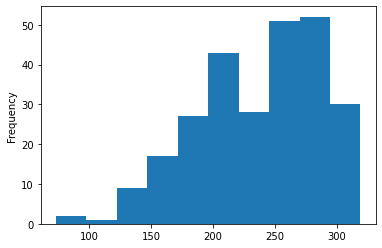

In [66]:
train_raw.text.apply(lambda x: len(x.split())).plot(kind='hist')

In [67]:
train_raw['len_txt'] =train_raw.text.apply(lambda x: len(x.split()))
train_raw.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Length,Humor,Sarcasm,Positive,Controversial,Argumentative,len_txt
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,641.750000,233.003846,0.226923,0.157692,0.330769,0.611538,0.346154,236.642308
std,388.521426,48.693074,0.419650,0.365155,0.471398,0.488340,0.476660,49.504094
min,2.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
25%,321.500000,198.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201.500000
50%,633.500000,245.000000,0.000000,0.000000,0.000000,1.000000,0.000000,246.500000
75%,940.250000,276.000000,0.000000,0.000000,1.000000,1.000000,1.000000,278.000000
max,1348.000000,302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,319.000000


In [68]:
train_raw.shape

(260, 13)

Select only the row with number of words greater than 250:

In [69]:
#train_raw = train_raw[train_raw.len_txt >249]
#train_raw.shape
ind = train_raw.len_txt >512
ind.sum()

0

Group similar products

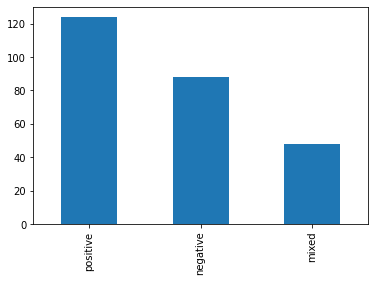

In [70]:
train_raw['label'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [0]:
train_raw = train_raw[['text','label']]

In [72]:
train_raw['label'] = LE.fit_transform(train_raw['label'])
train_raw.head()

,text,label
0,"Yet again, America's drug abuse problem takes ...",0
1,"A leader of the American Family Association, w...",0
2,Donald Trump’s campaign chairman Paul Manafort...,0
3,Sarah McBride peed the other day. But it wasn’...,0
4,"Trolling can take many forms, and on a recent ...",0


In [73]:
len(np.unique(train_raw['label']))

3

In [0]:
val = train_raw.copy()

Clean the text columns

In [0]:
import re
def clean_txt(text):
  text = re.sub("'", "",text)
  text=re.sub("(\\W)+"," ",text)    
  return text

In [76]:
val['text']  = val.text.apply(clean_txt)
val.head()

,text,label
0,Yet again Americas drug abuse problem takes it...,0
1,A leader of the American Family Association wh...,0
2,Donald Trump s campaign chairman Paul Manafort...,0
3,Sarah McBride peed the other day But it wasn t...,0
4,Trolling can take many forms and on a recent a...,0


In [77]:
val_lo = val[~val.index.isin(ind[ind==True].index)]
val_hi = val[val.index.isin(ind[ind==True].index)]
print(val_lo.shape)
print(val_hi.shape)

(260, 2)
(0, 2)


# Splitting the Data into smaller chunks

In [0]:
def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200]
      l_total.append(" ".join(l_parcial))
  return l_total

In [79]:
val_hi['text_split'] = val_hi[DATA_COLUMN].apply(get_split)
val_hi.head(2)

,text,label,text_split


In [80]:
val_l = []
val_label_l = []
val_index_l = []
for idx,row in val_hi.iterrows():
  for l in row['text_split']:
    val_l.append(l)
    val_label_l.append(row['label'])
    val_index_l.append(idx)
len(val_l), len(val_label_l), len(val_index_l)

(0, 0, 0)

The final dataset for training:

In [81]:
val_df = pd.DataFrame({DATA_COLUMN:val_l, LABEL_COLUMN:val_label_l})
val_df.head()

,text,label


In [0]:
val_df = pd.concat([val_df, val_lo], axis=0).reset_index(drop=True)

In [83]:
val_df.to_csv('/content/drive/My Drive/OMSCS/CSE6240 Web Search & Text Mining/Project/articles_df5.csv')

FileNotFoundError: ignored

# BERT: Data Preprocessing 

Process the data for BERT

In [0]:
val_InputExamples = val_df.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [85]:
val_InputExamples

0      <bert.run_classifier.InputExample object at 0x...
1      <bert.run_classifier.InputExample object at 0x...
2      <bert.run_classifier.InputExample object at 0x...
3      <bert.run_classifier.InputExample object at 0x...
4      <bert.run_classifier.InputExample object at 0x...
                             ...                        
255    <bert.run_classifier.InputExample object at 0x...
256    <bert.run_classifier.InputExample object at 0x...
257    <bert.run_classifier.InputExample object at 0x...
258    <bert.run_classifier.InputExample object at 0x...
259    <bert.run_classifier.InputExample object at 0x...
Length: 260, dtype: object

In [86]:
print("Row 0 - guid of training set : ", val_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", val_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", val_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", val_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  Yet again Americas drug abuse problem takes its toll White Americans life expectancy declined slightly in 2014 according to federal data reported in the New York Times dropping from 78 9 years in 2013 to 78 8 years in 2014 Â The reason Â Rising numbers of white Americans areÂ dying of drug overdoses particularly among thoseÂ in their mid 20s to mid 50s Liver disease and suicide have also reportedly played a role in white Americans stagnating life expectancies in recent years The increase in death in this segment of the population was great enough to affect life expectancy at birth for the whole group Elizabeth Arias aÂ statistician at the National Center for Health Statistics said according to the Times That is very unusual Unusual but not surprising Drug overdose deaths are on the rise according to the National Institute on Drug Abuse Its site offers data on overdose deaths for a variety of drugs betwee

In [87]:
#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(val_InputExamples.iloc[0].text_a))

['yet', 'again', 'americas', 'drug', 'abuse', 'problem', 'takes', 'its', 'toll', 'white', 'americans', 'life', 'expect', '##ancy', 'declined', 'slightly', 'in', '2014', 'according', 'to', 'federal', 'data', 'reported', 'in', 'the', 'new', 'york', 'times', 'dropping', 'from', '78', '9', 'years', 'in', '2013', 'to', '78', '8', 'years', 'in', '2014', 'a', 'the', 'reason', 'a', 'rising', 'numbers', 'of', 'white', 'americans', 'area', 'dying', 'of', 'drug', 'overdose', '##s', 'particularly', 'among', 'those', '##a', 'in', 'their', 'mid', '20s', 'to', 'mid', '50', '##s', 'liver', 'disease', 'and', 'suicide', 'have', 'also', 'reportedly', 'played', 'a', 'role', 'in', 'white', 'americans', 'st', '##ag', '##nat', '##ing', 'life', 'expect', '##an', '##cies', 'in', 'recent', 'years', 'the', 'increase', 'in', 'death', 'in', 'this', 'segment', 'of', 'the', 'population', 'was', 'great', 'enough', 'to', 'affect', 'life', 'expect', '##ancy', 'at', 'birth', 'for', 'the', 'whole', 'group', 'elizabeth', 

In [88]:
# Convert our train and validation features to InputFeatures that BERT understands.
val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 260


INFO:tensorflow:Writing example 0 of 260


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] yet again americas drug abuse problem takes its toll white americans life expect ##ancy declined slightly in 2014 according to federal data reported in the new york times dropping from 78 9 years in 2013 to 78 8 years in 2014 a the reason a rising numbers of white americans area dying of drug overdose ##s particularly among those ##a in their mid 20s to mid 50 ##s liver disease and suicide have also reportedly played a role in white americans st ##ag ##nat ##ing life expect ##an ##cies in recent years the increase in death in this segment of the population was great enough to affect life expect ##ancy at birth for the whole group elizabeth arias aa stat ##istic ##ian at the national center for health statistics said according to the times that is very unusual unusual but not surprising drug overdose deaths are on the rise according to the national institute on drug abuse its site offers data on overdose deaths for a variety of drugs between 2001 and 2014 a

INFO:tensorflow:tokens: [CLS] yet again americas drug abuse problem takes its toll white americans life expect ##ancy declined slightly in 2014 according to federal data reported in the new york times dropping from 78 9 years in 2013 to 78 8 years in 2014 a the reason a rising numbers of white americans area dying of drug overdose ##s particularly among those ##a in their mid 20s to mid 50 ##s liver disease and suicide have also reportedly played a role in white americans st ##ag ##nat ##ing life expect ##an ##cies in recent years the increase in death in this segment of the population was great enough to affect life expect ##ancy at birth for the whole group elizabeth arias aa stat ##istic ##ian at the national center for health statistics said according to the times that is very unusual unusual but not surprising drug overdose deaths are on the rise according to the national institute on drug abuse its site offers data on overdose deaths for a variety of drugs between 2001 and 2014 a

INFO:tensorflow:input_ids: 101 2664 2153 10925 4319 6905 3291 3138 2049 9565 2317 4841 2166 5987 11656 6430 3621 1999 2297 2429 2000 2976 2951 2988 1999 1996 2047 2259 2335 7510 2013 6275 1023 2086 1999 2286 2000 6275 1022 2086 1999 2297 1037 1996 3114 1037 4803 3616 1997 2317 4841 2181 5996 1997 4319 26641 2015 3391 2426 2216 2050 1999 2037 3054 27074 2000 3054 2753 2015 11290 4295 1998 5920 2031 2036 7283 2209 1037 2535 1999 2317 4841 2358 8490 19833 2075 2166 5987 2319 9243 1999 3522 2086 1996 3623 1999 2331 1999 2023 6903 1997 1996 2313 2001 2307 2438 2000 7461 2166 5987 11656 2012 4182 2005 1996 2878 2177 3870 25905 9779 28093 6553 2937 2012 1996 2120 2415 2005 2740 6747 2056 2429 2000 1996 2335 2008 2003 2200 5866 5866 2021 2025 11341 4319 26641 6677 2024 2006 1996 4125 2429 2000 1996 2120 2820 2006 4319 6905 2049 2609 4107 2951 2006 26641 6677 2005 1037 3528 1997 5850 2090 2541 1998 2297 1037 2005 19690 17770 7716 2401 4371 19265 2015 6728 3695 3593 3255 15872 2545 1998 2060 204

INFO:tensorflow:input_ids: 101 2664 2153 10925 4319 6905 3291 3138 2049 9565 2317 4841 2166 5987 11656 6430 3621 1999 2297 2429 2000 2976 2951 2988 1999 1996 2047 2259 2335 7510 2013 6275 1023 2086 1999 2286 2000 6275 1022 2086 1999 2297 1037 1996 3114 1037 4803 3616 1997 2317 4841 2181 5996 1997 4319 26641 2015 3391 2426 2216 2050 1999 2037 3054 27074 2000 3054 2753 2015 11290 4295 1998 5920 2031 2036 7283 2209 1037 2535 1999 2317 4841 2358 8490 19833 2075 2166 5987 2319 9243 1999 3522 2086 1996 3623 1999 2331 1999 2023 6903 1997 1996 2313 2001 2307 2438 2000 7461 2166 5987 11656 2012 4182 2005 1996 2878 2177 3870 25905 9779 28093 6553 2937 2012 1996 2120 2415 2005 2740 6747 2056 2429 2000 1996 2335 2008 2003 2200 5866 5866 2021 2025 11341 4319 26641 6677 2024 2006 1996 4125 2429 2000 1996 2120 2820 2006 4319 6905 2049 2609 4107 2951 2006 26641 6677 2005 1037 3528 1997 5850 2090 2541 1998 2297 1037 2005 19690 17770 7716 2401 4371 19265 2015 6728 3695 3593 3255 15872 2545 1998 2060 204

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a leader of the american family association which has loudly opposed target s transgender inclusive bathroom policy said monday that the group was sending men into women s restroom ##s in order to test the policy we ve already had people testing this going into targets and men going in to bathrooms there is absolutely no barrier sandy rios the director of government affairs for the af ##a told br ##eit ##bar ##t news daily the chief concern for the american family association is predators who will take advantage more than 1 1 million people have signed the af ##a s call to boycott target because of its policy allowing customers to use bathrooms and dressing rooms that correspond with their gender identity not the gender assigned to them at birth rios said that the policy would encourage men dressed like women to use the bathrooms and would create trauma for little girls i think the potential for sexual predators is just enormous she said lgbt ##q activists

INFO:tensorflow:tokens: [CLS] a leader of the american family association which has loudly opposed target s transgender inclusive bathroom policy said monday that the group was sending men into women s restroom ##s in order to test the policy we ve already had people testing this going into targets and men going in to bathrooms there is absolutely no barrier sandy rios the director of government affairs for the af ##a told br ##eit ##bar ##t news daily the chief concern for the american family association is predators who will take advantage more than 1 1 million people have signed the af ##a s call to boycott target because of its policy allowing customers to use bathrooms and dressing rooms that correspond with their gender identity not the gender assigned to them at birth rios said that the policy would encourage men dressed like women to use the bathrooms and would create trauma for little girls i think the potential for sexual predators is just enormous she said lgbt ##q activists

INFO:tensorflow:input_ids: 101 1037 3003 1997 1996 2137 2155 2523 2029 2038 9928 4941 4539 1055 16824 18678 5723 3343 2056 6928 2008 1996 2177 2001 6016 2273 2046 2308 1055 28249 2015 1999 2344 2000 3231 1996 3343 2057 2310 2525 2018 2111 5604 2023 2183 2046 7889 1998 2273 2183 1999 2000 28942 2045 2003 7078 2053 8803 7525 25836 1996 2472 1997 2231 3821 2005 1996 21358 2050 2409 7987 20175 8237 2102 2739 3679 1996 2708 5142 2005 1996 2137 2155 2523 2003 12630 2040 2097 2202 5056 2062 2084 1015 1015 2454 2111 2031 2772 1996 21358 2050 1055 2655 2000 17757 4539 2138 1997 2049 3343 4352 6304 2000 2224 28942 1998 11225 4734 2008 17254 2007 2037 5907 4767 2025 1996 5907 4137 2000 2068 2012 4182 25836 2056 2008 1996 3343 2052 8627 2273 5102 2066 2308 2000 2224 1996 28942 1998 2052 3443 12603 2005 2210 3057 1045 2228 1996 4022 2005 4424 12630 2003 2074 8216 2016 2056 12010 4160 10134 2391 2041 2008 2045 2038 2042 2053 3623 1999 4311 1997 4424 12630 1999 28942 1999 1996 3655 2008 2031 7528 909

INFO:tensorflow:input_ids: 101 1037 3003 1997 1996 2137 2155 2523 2029 2038 9928 4941 4539 1055 16824 18678 5723 3343 2056 6928 2008 1996 2177 2001 6016 2273 2046 2308 1055 28249 2015 1999 2344 2000 3231 1996 3343 2057 2310 2525 2018 2111 5604 2023 2183 2046 7889 1998 2273 2183 1999 2000 28942 2045 2003 7078 2053 8803 7525 25836 1996 2472 1997 2231 3821 2005 1996 21358 2050 2409 7987 20175 8237 2102 2739 3679 1996 2708 5142 2005 1996 2137 2155 2523 2003 12630 2040 2097 2202 5056 2062 2084 1015 1015 2454 2111 2031 2772 1996 21358 2050 1055 2655 2000 17757 4539 2138 1997 2049 3343 4352 6304 2000 2224 28942 1998 11225 4734 2008 17254 2007 2037 5907 4767 2025 1996 5907 4137 2000 2068 2012 4182 25836 2056 2008 1996 3343 2052 8627 2273 5102 2066 2308 2000 2224 1996 28942 1998 2052 3443 12603 2005 2210 3057 1045 2228 1996 4022 2005 4424 12630 2003 2074 8216 2016 2056 12010 4160 10134 2391 2041 2008 2045 2038 2042 2053 3623 1999 4311 1997 4424 12630 1999 28942 1999 1996 3655 2008 2031 7528 909

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] donald trump s campaign chairman paul mana ##fort denied a new york times report that political leaders in ukraine ear ##mark ##ed millions in undisclosed cash for him the times reported that the political party of ukraine s pro russian former president viktor yan ##uk ##ov ##ych set aside 12 7 million in undisclosed payments for the campaign operative mana ##fort responded to the report in a statement sent to nbc news on monday calling it un ##founded silly and non ##sen ##sic ##al i have never received a single off the books cash payment as falsely reported by the new york times nor have i ever done work for the governments of ukraine or russia mana ##fort said adding that any payments he did receive overseas were for his entire political team this suggestion that i accepted cash payments is un ##founded silly and non ##sen ##sic ##al the times report said anti corruption officials are investigating the ear ##mark ##ed payments which were recorded on a s

INFO:tensorflow:tokens: [CLS] donald trump s campaign chairman paul mana ##fort denied a new york times report that political leaders in ukraine ear ##mark ##ed millions in undisclosed cash for him the times reported that the political party of ukraine s pro russian former president viktor yan ##uk ##ov ##ych set aside 12 7 million in undisclosed payments for the campaign operative mana ##fort responded to the report in a statement sent to nbc news on monday calling it un ##founded silly and non ##sen ##sic ##al i have never received a single off the books cash payment as falsely reported by the new york times nor have i ever done work for the governments of ukraine or russia mana ##fort said adding that any payments he did receive overseas were for his entire political team this suggestion that i accepted cash payments is un ##founded silly and non ##sen ##sic ##al the times report said anti corruption officials are investigating the ear ##mark ##ed payments which were recorded on a s

INFO:tensorflow:input_ids: 101 6221 8398 1055 3049 3472 2703 24951 13028 6380 1037 2047 2259 2335 3189 2008 2576 4177 1999 5924 4540 10665 2098 8817 1999 18206 5356 2005 2032 1996 2335 2988 2008 1996 2576 2283 1997 5924 1055 4013 2845 2280 2343 13489 13619 6968 4492 17994 2275 4998 2260 1021 2454 1999 18206 10504 2005 1996 3049 12160 24951 13028 5838 2000 1996 3189 1999 1037 4861 2741 2000 6788 2739 2006 6928 4214 2009 4895 21001 10021 1998 2512 5054 19570 2389 1045 2031 2196 2363 1037 2309 2125 1996 2808 5356 7909 2004 23123 2988 2011 1996 2047 2259 2335 4496 2031 1045 2412 2589 2147 2005 1996 6867 1997 5924 2030 3607 24951 13028 2056 5815 2008 2151 10504 2002 2106 4374 6931 2020 2005 2010 2972 2576 2136 2023 10293 2008 1045 3970 5356 10504 2003 4895 21001 10021 1998 2512 5054 19570 2389 1996 2335 3189 2056 3424 7897 4584 2024 11538 1996 4540 10665 2098 10504 2029 2020 2680 2006 1037 3595 27106 2295 2027 2031 2025 4340 3251 2030 2025 24951 13028 2941 2363 2151 5356 24951 13028 2056 20

INFO:tensorflow:input_ids: 101 6221 8398 1055 3049 3472 2703 24951 13028 6380 1037 2047 2259 2335 3189 2008 2576 4177 1999 5924 4540 10665 2098 8817 1999 18206 5356 2005 2032 1996 2335 2988 2008 1996 2576 2283 1997 5924 1055 4013 2845 2280 2343 13489 13619 6968 4492 17994 2275 4998 2260 1021 2454 1999 18206 10504 2005 1996 3049 12160 24951 13028 5838 2000 1996 3189 1999 1037 4861 2741 2000 6788 2739 2006 6928 4214 2009 4895 21001 10021 1998 2512 5054 19570 2389 1045 2031 2196 2363 1037 2309 2125 1996 2808 5356 7909 2004 23123 2988 2011 1996 2047 2259 2335 4496 2031 1045 2412 2589 2147 2005 1996 6867 1997 5924 2030 3607 24951 13028 2056 5815 2008 2151 10504 2002 2106 4374 6931 2020 2005 2010 2972 2576 2136 2023 10293 2008 1045 3970 5356 10504 2003 4895 21001 10021 1998 2512 5054 19570 2389 1996 2335 3189 2056 3424 7897 4584 2024 11538 1996 4540 10665 2098 10504 2029 2020 2680 2006 1037 3595 27106 2295 2027 2031 2025 4340 3251 2030 2025 24951 13028 2941 2363 2151 5356 24951 13028 2056 20

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] sarah mcbride pee ##d the other day but it wasn t just any trip to the bathroom sarah is a transgender woman and she chose to use a women s restroom in north carolina in a government building no less sarah s powerful act comes after north carolina put h ##b ##2 into effect a law that requires bathroom go ##ers to use the restroom of their gender at birth consequently disc ##rim ##inating against many in the lgbt community the 25 year old trans woman and activist is the communications manager for lgbt progress at american progress and she was recently in north carolina to speak to trans people about how the law was affecting their lives then after a meeting at the mecklenburg government center on thursday she went to the ladies room the response on facebook was overwhelming garner ##ing 38 000 reactions and 13 80 ##4 shares at the time of publication i m sorry for my state sarah i m hoping very much they see the error of their ways and repeal this piece of 

INFO:tensorflow:tokens: [CLS] sarah mcbride pee ##d the other day but it wasn t just any trip to the bathroom sarah is a transgender woman and she chose to use a women s restroom in north carolina in a government building no less sarah s powerful act comes after north carolina put h ##b ##2 into effect a law that requires bathroom go ##ers to use the restroom of their gender at birth consequently disc ##rim ##inating against many in the lgbt community the 25 year old trans woman and activist is the communications manager for lgbt progress at american progress and she was recently in north carolina to speak to trans people about how the law was affecting their lives then after a meeting at the mecklenburg government center on thursday she went to the ladies room the response on facebook was overwhelming garner ##ing 38 000 reactions and 13 80 ##4 shares at the time of publication i m sorry for my state sarah i m hoping very much they see the error of their ways and repeal this piece of 

INFO:tensorflow:input_ids: 101 4532 18958 21392 2094 1996 2060 2154 2021 2009 2347 1056 2074 2151 4440 2000 1996 5723 4532 2003 1037 16824 2450 1998 2016 4900 2000 2224 1037 2308 1055 28249 1999 2167 3792 1999 1037 2231 2311 2053 2625 4532 1055 3928 2552 3310 2044 2167 3792 2404 1044 2497 2475 2046 3466 1037 2375 2008 5942 5723 2175 2545 2000 2224 1996 28249 1997 2037 5907 2012 4182 8821 5860 20026 19185 2114 2116 1999 1996 12010 2451 1996 2423 2095 2214 9099 2450 1998 7423 2003 1996 4806 3208 2005 12010 5082 2012 2137 5082 1998 2016 2001 3728 1999 2167 3792 2000 3713 2000 9099 2111 2055 2129 1996 2375 2001 12473 2037 3268 2059 2044 1037 3116 2012 1996 22007 2231 2415 2006 9432 2016 2253 2000 1996 6456 2282 1996 3433 2006 9130 2001 10827 18661 2075 4229 2199 9597 1998 2410 3770 2549 6661 2012 1996 2051 1997 4772 1045 1049 3374 2005 2026 2110 4532 1045 1049 5327 2200 2172 2027 2156 1996 7561 1997 2037 3971 1998 21825 2023 3538 1997 13044 2574 4067 2017 2005 4911 1996 3513 2000 19141 212

INFO:tensorflow:input_ids: 101 4532 18958 21392 2094 1996 2060 2154 2021 2009 2347 1056 2074 2151 4440 2000 1996 5723 4532 2003 1037 16824 2450 1998 2016 4900 2000 2224 1037 2308 1055 28249 1999 2167 3792 1999 1037 2231 2311 2053 2625 4532 1055 3928 2552 3310 2044 2167 3792 2404 1044 2497 2475 2046 3466 1037 2375 2008 5942 5723 2175 2545 2000 2224 1996 28249 1997 2037 5907 2012 4182 8821 5860 20026 19185 2114 2116 1999 1996 12010 2451 1996 2423 2095 2214 9099 2450 1998 7423 2003 1996 4806 3208 2005 12010 5082 2012 2137 5082 1998 2016 2001 3728 1999 2167 3792 2000 3713 2000 9099 2111 2055 2129 1996 2375 2001 12473 2037 3268 2059 2044 1037 3116 2012 1996 22007 2231 2415 2006 9432 2016 2253 2000 1996 6456 2282 1996 3433 2006 9130 2001 10827 18661 2075 4229 2199 9597 1998 2410 3770 2549 6661 2012 1996 2051 1997 4772 1045 1049 3374 2005 2026 2110 4532 1045 1049 5327 2200 2172 2027 2156 1996 7561 1997 2037 3971 1998 21825 2023 3538 1997 13044 2574 4067 2017 2005 4911 1996 3513 2000 19141 212

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] troll ##ing can take many forms and on a recent airing of fox news the ore ##illy factor host bill ore ##illy opted for the direct approach on a mission to ostensibly figure out why in his words college students these days are very sensitive individuals ore ##illy sent correspondent ##a jesse ##a watt ##ers to princeton university to ask students if they were offended by the word ghetto when someone says ghetto how do you feel about that watt ##ers asked a black student in the segments opening dialogue a i feel like they should be more careful in their choice of words the student responded a things went on from there watt ##ers ended the segment on a light note with ore ##illy laughing about the experience they didn ##t seem as crazy as some of these other college kids who start to cry when they see donald trump ##s name chalk ##ed on a wall or something said ore ##illy they actually took you seriously that ##s the biggest mistake they made watt ##ers repl

INFO:tensorflow:tokens: [CLS] troll ##ing can take many forms and on a recent airing of fox news the ore ##illy factor host bill ore ##illy opted for the direct approach on a mission to ostensibly figure out why in his words college students these days are very sensitive individuals ore ##illy sent correspondent ##a jesse ##a watt ##ers to princeton university to ask students if they were offended by the word ghetto when someone says ghetto how do you feel about that watt ##ers asked a black student in the segments opening dialogue a i feel like they should be more careful in their choice of words the student responded a things went on from there watt ##ers ended the segment on a light note with ore ##illy laughing about the experience they didn ##t seem as crazy as some of these other college kids who start to cry when they see donald trump ##s name chalk ##ed on a wall or something said ore ##illy they actually took you seriously that ##s the biggest mistake they made watt ##ers repl

INFO:tensorflow:input_ids: 101 18792 2075 2064 2202 2116 3596 1998 2006 1037 3522 10499 1997 4419 2739 1996 10848 20577 5387 3677 3021 10848 20577 12132 2005 1996 3622 3921 2006 1037 3260 2000 23734 3275 2041 2339 1999 2010 2616 2267 2493 2122 2420 2024 2200 7591 3633 10848 20577 2741 11370 2050 7627 2050 15231 2545 2000 9173 2118 2000 3198 2493 2065 2027 2020 15807 2011 1996 2773 17276 2043 2619 2758 17276 2129 2079 2017 2514 2055 2008 15231 2545 2356 1037 2304 3076 1999 1996 9214 3098 7982 1037 1045 2514 2066 2027 2323 2022 2062 6176 1999 2037 3601 1997 2616 1996 3076 5838 1037 2477 2253 2006 2013 2045 15231 2545 3092 1996 6903 2006 1037 2422 3602 2007 10848 20577 5870 2055 1996 3325 2027 2134 2102 4025 2004 4689 2004 2070 1997 2122 2060 2267 4268 2040 2707 2000 5390 2043 2027 2156 6221 8398 2015 2171 16833 2098 2006 1037 2813 2030 2242 2056 10848 20577 2027 2941 2165 2017 5667 2008 2015 1996 5221 6707 2027 2081 15231 2545 3880 1037 9906 2679 2038 2042 2019 2926 9685 8476 2006 1996 7

INFO:tensorflow:input_ids: 101 18792 2075 2064 2202 2116 3596 1998 2006 1037 3522 10499 1997 4419 2739 1996 10848 20577 5387 3677 3021 10848 20577 12132 2005 1996 3622 3921 2006 1037 3260 2000 23734 3275 2041 2339 1999 2010 2616 2267 2493 2122 2420 2024 2200 7591 3633 10848 20577 2741 11370 2050 7627 2050 15231 2545 2000 9173 2118 2000 3198 2493 2065 2027 2020 15807 2011 1996 2773 17276 2043 2619 2758 17276 2129 2079 2017 2514 2055 2008 15231 2545 2356 1037 2304 3076 1999 1996 9214 3098 7982 1037 1045 2514 2066 2027 2323 2022 2062 6176 1999 2037 3601 1997 2616 1996 3076 5838 1037 2477 2253 2006 2013 2045 15231 2545 3092 1996 6903 2006 1037 2422 3602 2007 10848 20577 5870 2055 1996 3325 2027 2134 2102 4025 2004 4689 2004 2070 1997 2122 2060 2267 4268 2040 2707 2000 5390 2043 2027 2156 6221 8398 2015 2171 16833 2098 2006 1037 2813 2030 2242 2056 10848 20577 2027 2941 2165 2017 5667 2008 2015 1996 5221 6707 2027 2081 15231 2545 3880 1037 9906 2679 2038 2042 2019 2926 9685 8476 2006 1996 7

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

INFO:tensorflow:label: 0.0 (id = 0)


INFO:tensorflow:label: 0.0 (id = 0)


In [89]:
#Example on first observation in the training set
print("Sentence : ", val_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(val_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", val_features[0].input_ids)
print("-"*30)
print("Input Masks : ", val_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", val_features[0].segment_ids)

Sentence :  Yet again Americas drug abuse problem takes its toll White Americans life expectancy declined slightly in 2014 according to federal data reported in the New York Times dropping from 78 9 years in 2013 to 78 8 years in 2014 Â The reason Â Rising numbers of white Americans areÂ dying of drug overdoses particularly among thoseÂ in their mid 20s to mid 50s Liver disease and suicide have also reportedly played a role in white Americans stagnating life expectancies in recent years The increase in death in this segment of the population was great enough to affect life expectancy at birth for the whole group Elizabeth Arias aÂ statistician at the National Center for Health Statistics said according to the Times That is very unusual Unusual but not surprising Drug overdose deaths are on the rise according to the National Institute on Drug Abuse Its site offers data on overdose deaths for a variety of drugs between 2001 and 2014 Â For heroin benzodiazepines opioid painkillers and oth

# Val Input Fn BERT

In [0]:
# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

# BERT: Evaluating on Articles

The accuracy for the fine tuned BERT model

In [91]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-04-28T00:09:55Z


INFO:tensorflow:Starting evaluation at 2020-04-28T00:09:55Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-2339


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-2339


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-04-28-00:10:07


INFO:tensorflow:Finished evaluation at 2020-04-28-00:10:07


INFO:tensorflow:Saving dict for global step 2339: eval_accuracy = 0.41153845, false_negatives = 69.0, false_positives = 31.0, global_step = 2339, loss = 1.1391656, true_negatives = 17.0, true_positives = 143.0


INFO:tensorflow:Saving dict for global step 2339: eval_accuracy = 0.41153845, false_negatives = 69.0, false_positives = 31.0, global_step = 2339, loss = 1.1391656, true_negatives = 17.0, true_positives = 143.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2339: /bert_news_category/model.ckpt-2339


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2339: /bert_news_category/model.ckpt-2339


{'eval_accuracy': 0.41153845,
 'false_negatives': 69.0,
 'false_positives': 31.0,
 'global_step': 2339,
 'loss': 1.1391656,
 'true_negatives': 17.0,
 'true_positives': 143.0}

# Using BERT Vector Transformations in LSTM (Optional)

In [0]:
# A method to get predictions
def getPrediction(in_sentences, type_output = "features"):
  #A list to map the actual labels to the predictions
  labels = np.unique(train['label'])
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list, MAX_SEQ_LENGTH, tokenizer)
  #Predicting the classes 
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  if type_output == "features":
    return [prediction['pooled_output'] for _,prediction in enumerate(predictions) ]
  else:
    return ([(sentence, prediction['probabilities'],
              prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)])


In [0]:
tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)
MAX_SEQ_LENGTH

200

In [0]:
train_df.shape, val_df.shape

((45478, 2), (11389, 2))

Now extracting the representations:

In [0]:
%%time
tr_emb = np.apply_along_axis(getPrediction, 0,np.array(train_df[DATA_COLUMN]))
tr_emb.shape

CPU times: user 2min 59s, sys: 1min 1s, total: 4min 1s
Wall time: 21min 40s


In [0]:
%%time
val_emb = np.apply_along_axis(getPrediction, 0,np.array(val_df[DATA_COLUMN]))
val_emb.shape

CPU times: user 47.8 s, sys: 15.5 s, total: 1min 3s
Wall time: 5min 29s


In [0]:
val_emb.shape, tr_emb.shape

((11389, 768), (45478, 768))

and make the dataset for train and val:

In [0]:
index_l = train_df.index
val_index_l = val_df.index

In [0]:
aux = -1
len_l = 0
train_x = {}
for l, emb in zip(index_l, tr_emb):
  if l in train_x.keys():
    train_x[l]  =np.vstack([train_x[l], emb])
  else:
    train_x[l] = [emb]

len(train_x.keys())


45478

In [0]:
train_l_final = []
label_l_final = []
for k in train_x.keys():
  train_l_final.append(train_x[k])
  label_l_final.append(train_df.loc[k]['label'])

df_train = pd.DataFrame({'emb': train_l_final, 'label': label_l_final, })
df_train.head()

,emb,label
0,"[[-0.69760984, -0.23813823, 0.12087678, 0.4723...",3
1,"[[-0.2590735, 0.41492596, 0.9647107, 0.1478490...",3
2,"[[-0.66147554, 0.13714084, 0.9400091, 0.301015...",1
3,"[[-0.45993647, -0.17232634, 0.5241977, 0.26222...",1
4,"[[0.34092507, 0.16185749, 0.93247384, -0.31810...",0


In [0]:
aux = -1
len_l = 0
val_x = {}

for l, emb in zip(val_index_l, val_emb):
  if l in val_x.keys():
    val_x[l]  =np.vstack([val_x[l], emb])
  else:
    val_x[l] = [emb]


val_l_final = []
vlabel_l_final = []
for k in val_x.keys():
  val_l_final.append(val_x[k])
  vlabel_l_final.append(val_df.loc[k]['label'])

df_val = pd.DataFrame({'emb': val_l_final, 'label': vlabel_l_final})
df_val.head()

,emb,label
0,"[[0.4948553, 0.2777687, 0.9994403, -0.6164913,...",2
1,"[[0.123172425, -0.19518024, 0.961045, -0.25922...",2
2,"[[0.30272684, 0.47506917, 0.99982846, -0.73929...",2
3,"[[-0.77450377, -0.010807645, 0.88968754, 0.691...",4
4,"[[-0.5057215, -0.0024662102, 0.9497135, 0.2925...",3


In [0]:
df_val, df_test = train_test_split(df_val, test_size=0.4, random_state=35)

# LSTM: Creating the Final Model

In [0]:
from keras import layers
text_input = Input(shape=(None,768,), dtype='float32', name='text')

l_mask = layers.Masking(mask_value=-99.)(text_input)
# Which we encoded in a single vector via a LSTM
encoded_text = layers.LSTM(100,)(l_mask)
out_dense = layers.Dense(30, activation='relu')(encoded_text)
# And we add a softmax classifier on top
out = layers.Dense(len(label_list), activation='softmax')(out_dense)
# At model instantiation, we specify the input and the output:
model = Model(text_input, out)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            (None, None, 768)         0         
_________________________________________________________________
masking_1 (Masking)          (None, None, 768)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               347600    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 155       
Total params: 350,785
Trainable params: 350,785
Non-trainable params: 0
_________________________________________________________________


In [0]:
df_train.shape, df_val.shape, df_test.shape

((45480, 2), (3757, 2), (2506, 2))

The generator functions:

In [0]:
num_sequences = len(df_train['emb'].to_list())
batch_size = 30
batches_per_epoch =  1516
assert batch_size * batches_per_epoch == num_sequences
num_features= 768
def train_generator(df):
    x_list= df['emb'].to_list()
    y_list =  df.label.to_list()
    # Generate batches
    while True:
        for b in range(batches_per_epoch):
            longest_index = (b + 1) * batch_size - 1
            timesteps = len(max(df['emb'].to_list()[:(b + 1) * batch_size][-batch_size:], key=len))
            x_train = np.full((batch_size, timesteps, num_features), -99.)
            y_train = np.zeros((batch_size,  1))
            for i in range(batch_size):
                li = b * batch_size + i
                x_train[i, 0:len(x_list[li]), :] = x_list[li]
                y_train[i] = y_list[li]
            yield x_train, y_train

In [0]:
num_sequences_val = len(df_val['emb'].to_list())
batch_size_val = 17
batches_per_epoch_val = 221
assert batch_size_val * batches_per_epoch_val == num_sequences_val
num_features= 768
def val_generator(df):
    x_list= df['emb'].to_list()
    y_list =  df.label.to_list()
    # Generate batches
    while True:
        for b in range(batches_per_epoch_val):
            longest_index = (b + 1) * batch_size_val - 1
            timesteps = len(max(df['emb'].to_list()[:(b + 1) * batch_size_val][-31:], key=len))
            # print(len(df_train['emb'].to_list()[:b+batch_size][-7:]))
            x_train = np.full((batch_size_val, timesteps, num_features), -99.)
            y_train = np.zeros((batch_size_val,  1))
            for i in range(batch_size_val):
                li = b * batch_size_val + i
                # print("li", li)
                # print(x_train[i, 0:len(x_list[li]), :].shape, len(x_list[li]))
                x_train[i, 0:len(x_list[li]), :] = x_list[li]
                y_train[i] = y_list[li]
            yield x_train, y_train

# LSTM Final Model: Training

In [0]:
from keras.callbacks import ReduceLROnPlateau
call_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.95, patience=3, verbose=2,
                                mode='auto', min_delta=0.01, cooldown=0, min_lr=0)

In [0]:
model.fit_generator(train_generator(df_train), steps_per_epoch=batches_per_epoch, epochs=20,
                    validation_data=val_generator(df_val), validation_steps=batches_per_epoch_val, callbacks =[call_reduce] )

Epoch 1/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.9528 - acc: 0.6301 - val_loss: 1.0363 - val_acc: 0.5337
Epoch 2/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.9280 - acc: 0.6371 - val_loss: 1.0373 - val_acc: 0.5374
Epoch 3/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.9181 - acc: 0.6395 - val_loss: 1.0762 - val_acc: 0.5369
Epoch 4/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.9110 - acc: 0.6406 - val_loss: 1.1004 - val_acc: 0.5398

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.
Epoch 5/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.9023 - acc: 0.6421 - val_loss: 1.0876 - val_acc: 0.5419
Epoch 6/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.8946 - acc: 0.6449 - val_loss: 1.0968 - val_acc: 0.5419
Epoch 7/20
1516/1516 [==============================] - 12s 8ms/step - loss: 0.8883 - acc: 0.6450 - val_loss:

# LSTM Final Model: Evaluation



In [0]:
num_sequences_val = len(df_test['emb'].to_list())
batch_size_val = 14
batches_per_epoch_val = 179
assert batch_size_val * batches_per_epoch_val == num_sequences_val
num_features= 768
model.evaluate_generator(val_generator(df_test), steps= batches_per_epoch_val)

[0.8542419672012329, 0.5578611493110657]

In [0]:
from sklearn.metrics import plot_confusion_matrix

In [0]:
disp = plot_confusion_matrix(model, x1_test_split, y1_test_split,
                              display_labels=['negative', 'positive', 'mixed'],
                              cmap=plt.cm.Blues,
                              normalize='pred')
disp.ax_.set_title('Confusion matrix for sentiment prediction on comments test data')

print(disp.confusion_matrix)

plt.savefig('accuracy.jpg')
plt.show()